In [1]:
library(forecast)
library(xts)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.3 



In [2]:
casediff <- as.xts(read.csv("casediff.csv", row.names = 1, stringsAsFactor = FALSE))
deathdiff <- as.xts(read.csv("deathdiff.csv", row.names = 1, stringsAsFactor = FALSE))

In [2]:
a.ari.fun <- function(x) {
    #n <- paste0(names(x))
    d <- as.character(index(tail(x,1)))
    a.ari <- auto.arima(x)
    fore <- forecast.Arima(object = a.ari, h = 7, level = c(.9))
    model <- as.character(fore$model)
    modeli <<- c(modeli,c(d,model))
    mean <- tail(fore$mean, 1)
    low <- tail(fore$lower, 1)
    high <- tail(fore$upper, 1)
    result <- c(low, high, mean)
    names(result) <- c("low", "high", "mean")
    return(result)
}

                 ME     RMSE      MAE       MPE    MAPE
Test set -0.6743879 16.79377 6.620075 -11.37651 35.9086


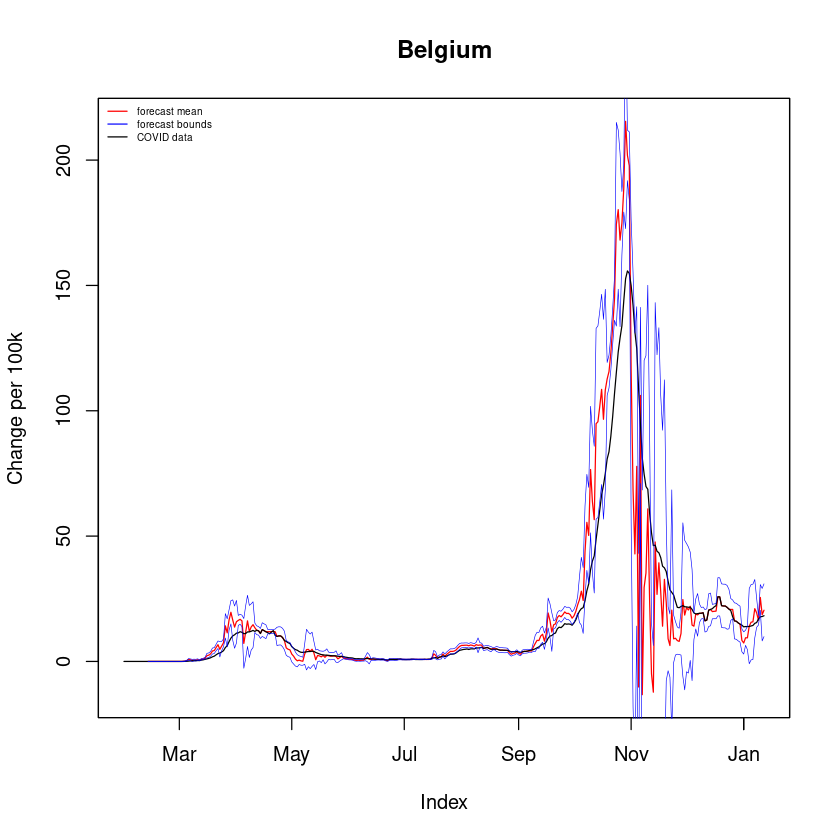

                 ME     RMSE      MAE       MPE     MAPE
Test set -0.5254219 2.797766 1.434944 -12.31868 19.90145


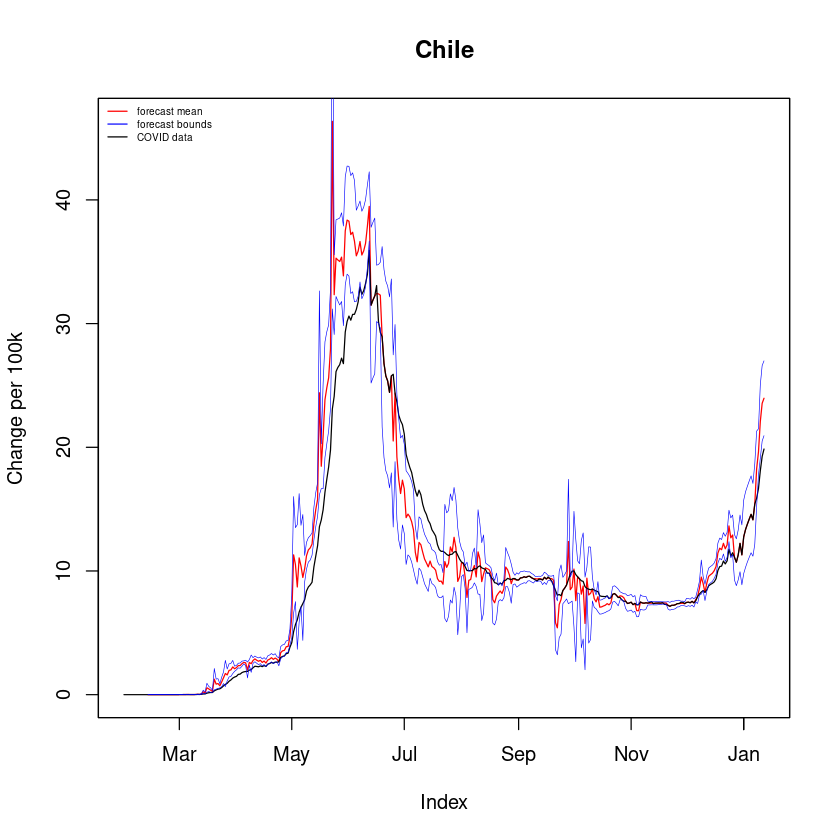

                  ME       RMSE         MAE      MPE    MAPE
Test set 0.002274398 0.02227498 0.005059339 23.98747 51.0933


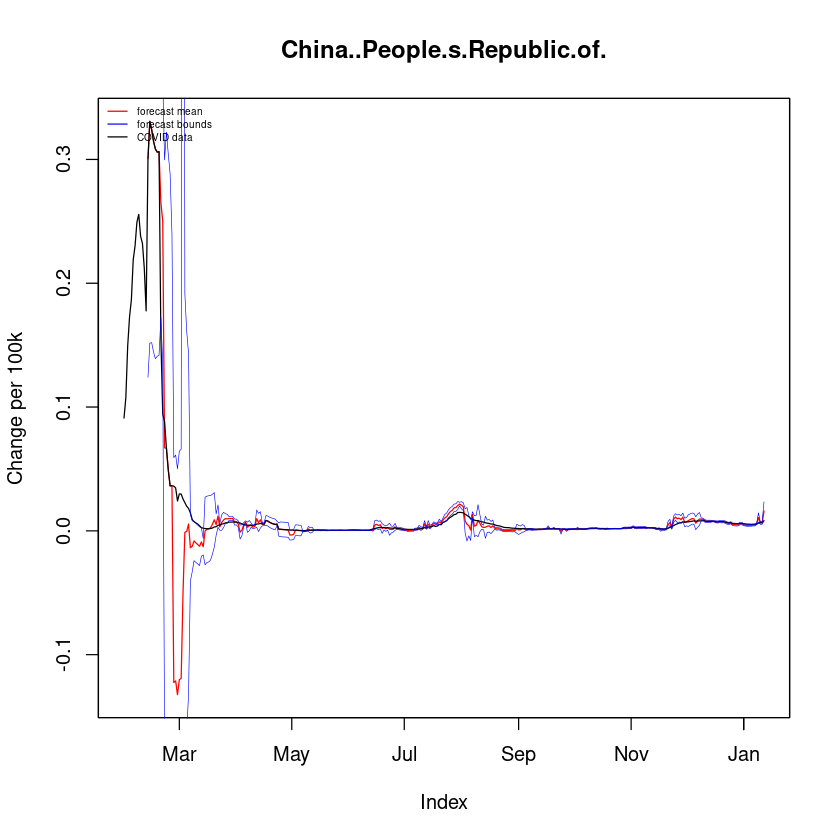

                ME     RMSE      MAE       MPE     MAPE
Test set -0.185088 2.360732 1.053774 -11.53306 32.61379


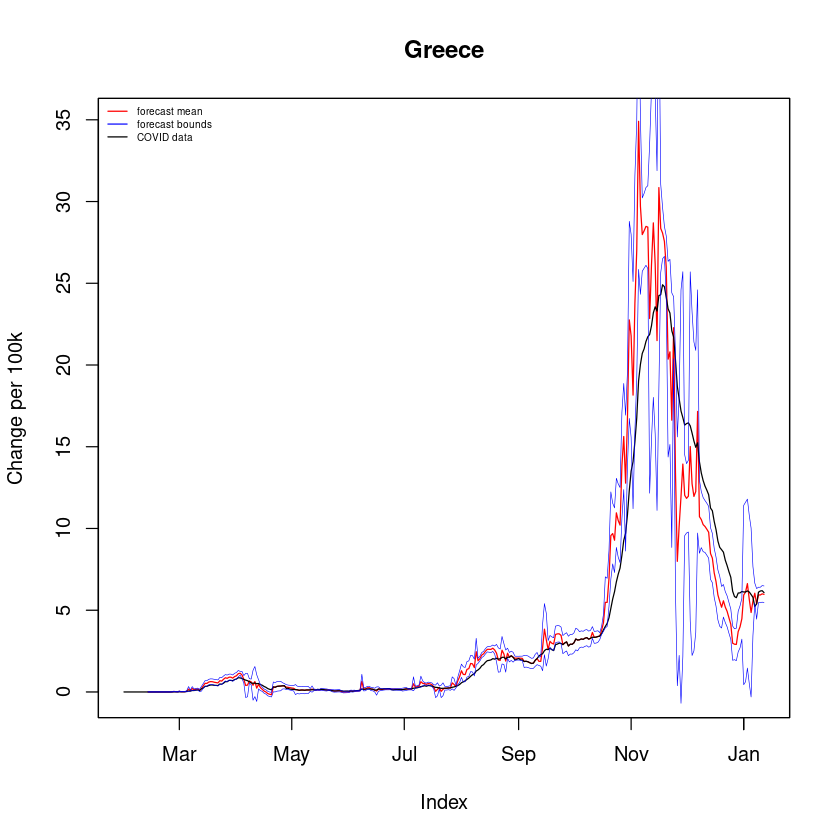

                  ME      RMSE       MAE          MPE         MAPE
Test set -0.04814805 0.3769526 0.2678247 6.763319e+15 6.763319e+15


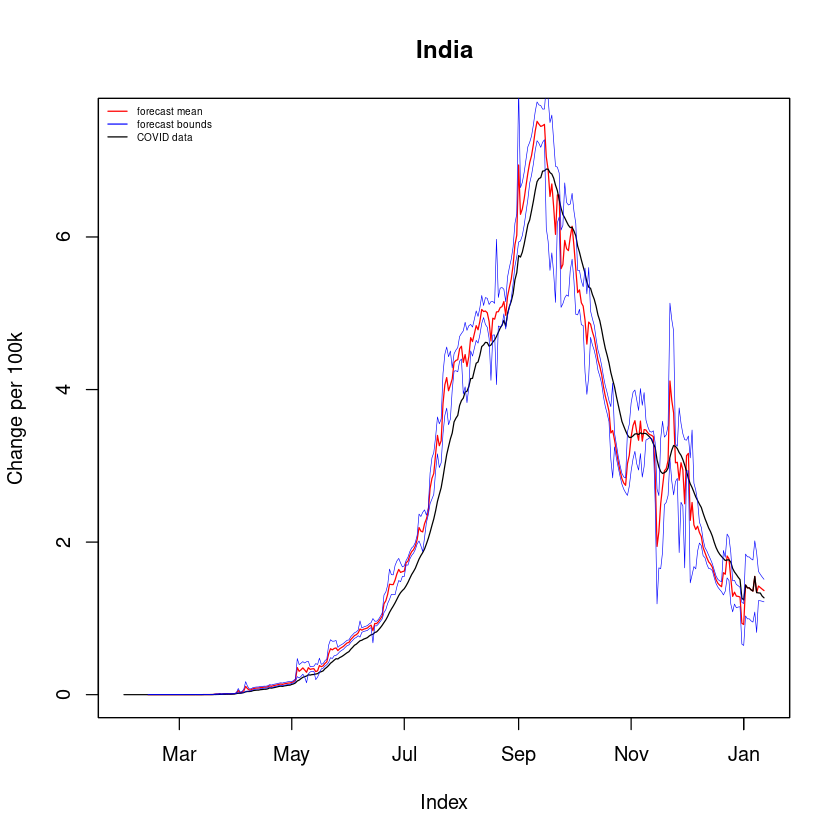

                ME     RMSE      MAE       MPE     MAPE
Test set -2.550136 15.55986 4.413462 -5.501026 40.95609


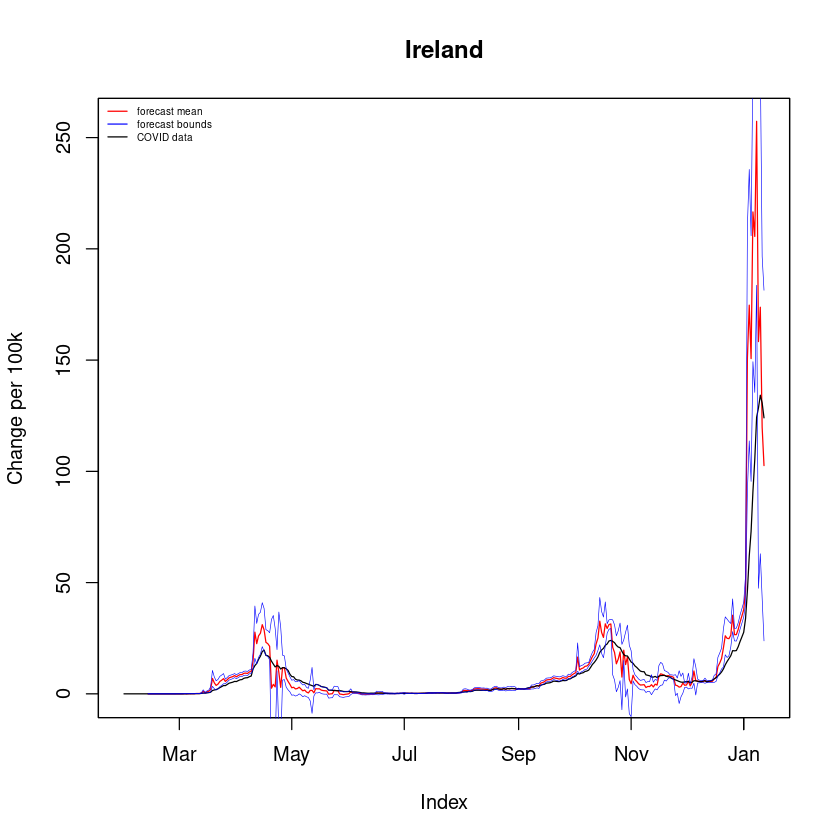

                ME     RMSE      MAE       MPE     MAPE
Test set -1.916151 7.145976 4.111438 -12.00826 41.05481


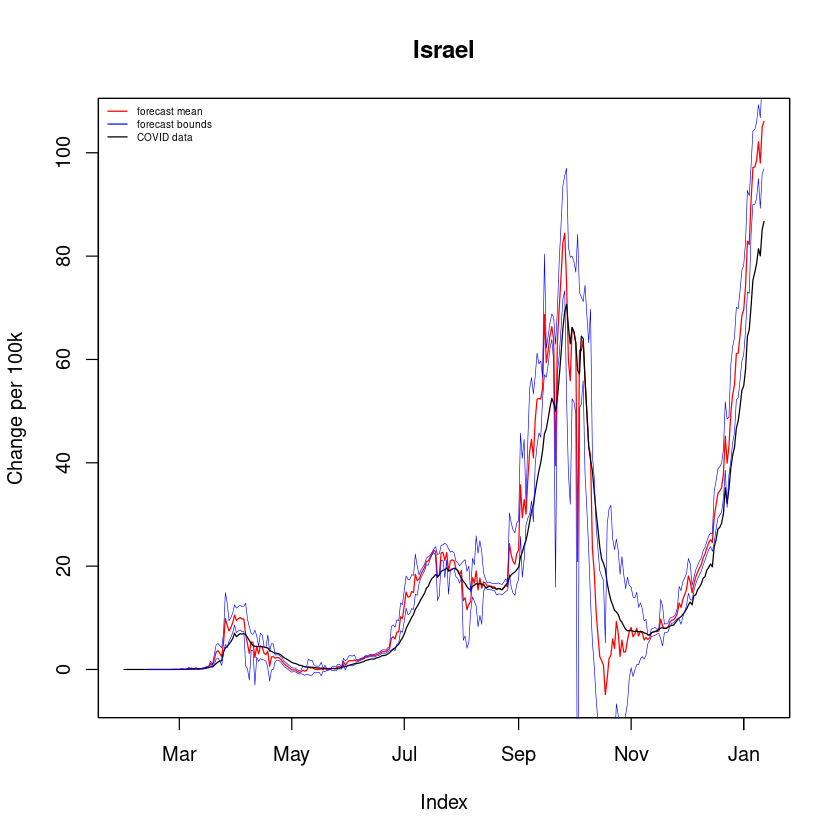

                 ME     RMSE      MAE  MPE MAPE
Test set -0.7237533 4.320727 2.418573 -Inf  Inf


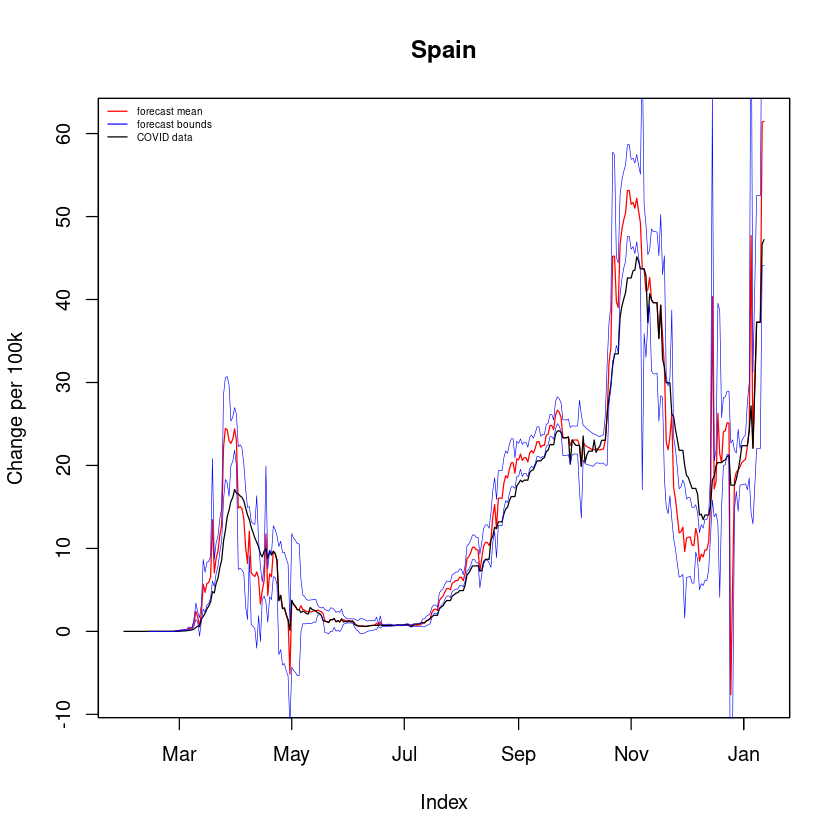

                 ME    RMSE      MAE       MPE     MAPE
Test set -0.1972713 8.85483 1.868328 -18.92823 34.00014


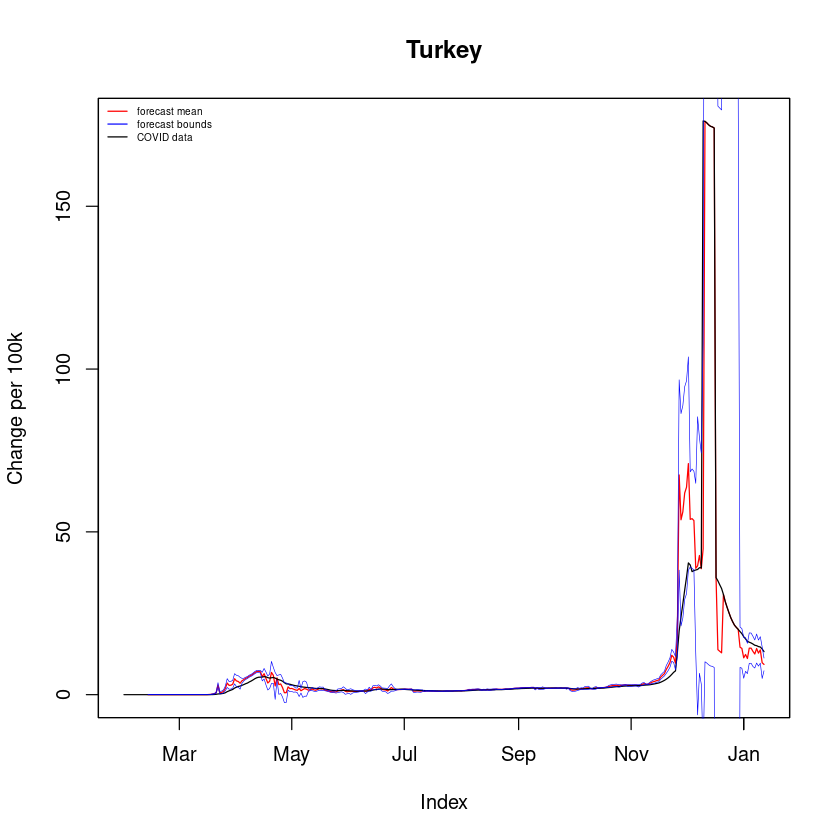

                ME     RMSE      MAE      MPE    MAPE
Test set -1.839099 6.102799 2.955647 -17.3358 35.0512


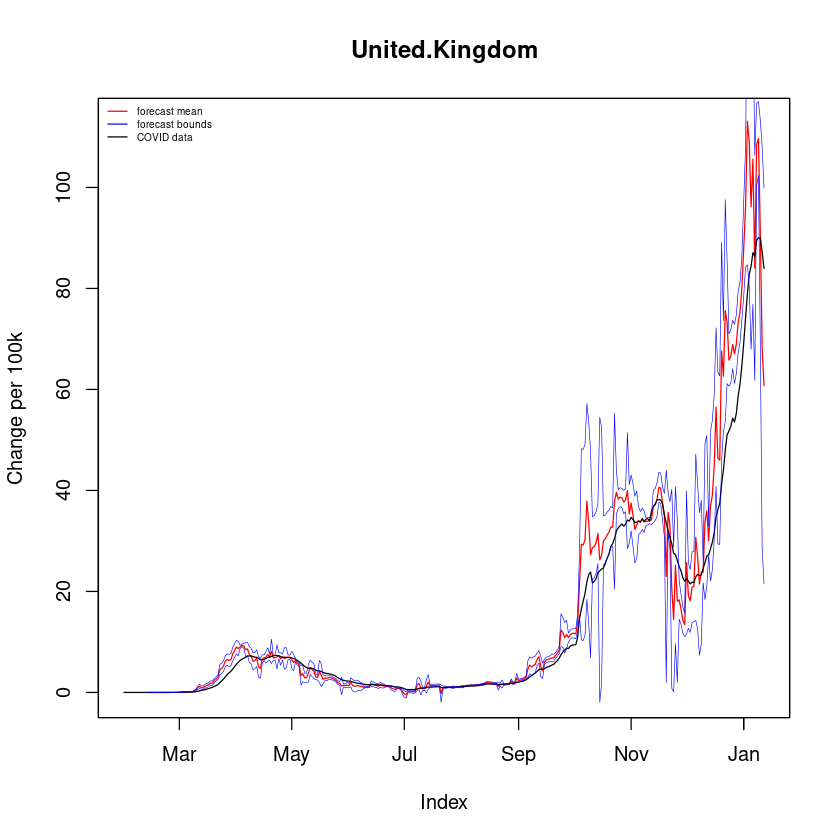

                ME     RMSE      MAE       MPE     MAPE
Test set -1.476284 5.199514 2.625379 -20.57561 27.26739


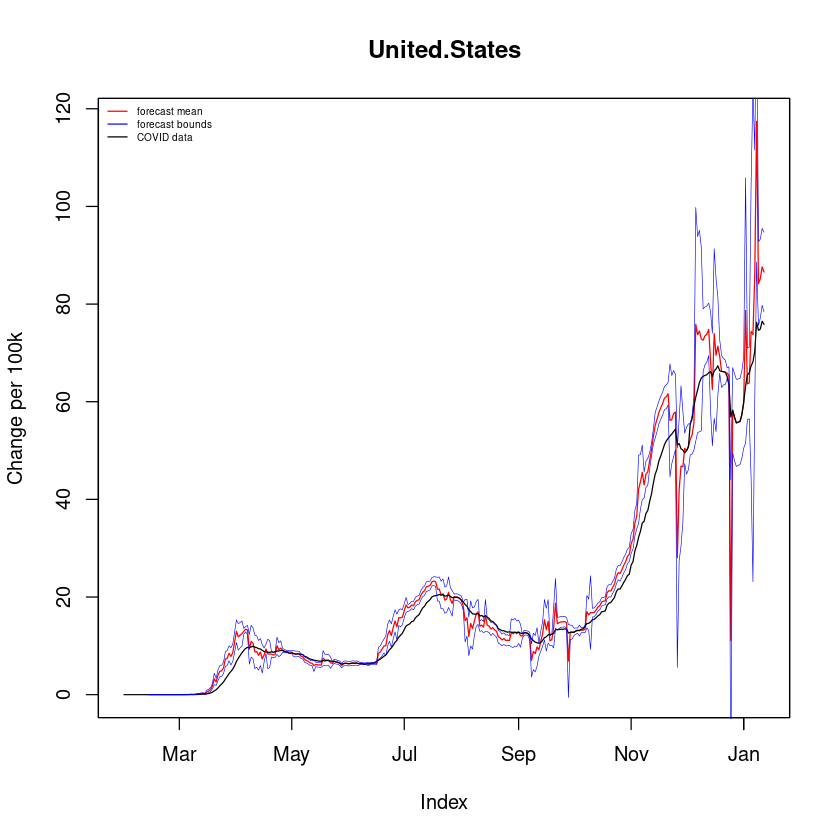

In [23]:

modlist <- list()
for (i in names(casediff)) {
    ts1 <- casediff[,i]
    #name <- paste0("tsarima.",i)
    modeli <- c()
    tsarima <- rollapply(ts1, 14, a.ari.fun, by.column=FALSE)
    moddf <- data.frame(t(matrix(modeli,2)))
    names(moddf) <- c("Date","model")
    rownames(moddf) <- as.Date(moddf$Date, format = "%Y-%m-%d")
    moddf <- subset(moddf, select = c("model"))
    tsdata <- data.frame(merge(ts1,tsarima))
    names(tsdata) <- c("rate","low", "high", "mean")
    sumfinal <- merge(tsdata,moddf,by=0)
    plot.zoo(tsarima[,"mean"],col="red",plot.type="single",main = i,ylab = "Change per 100k")
    lines(ts1,col="black")
    lines(tsarima[,"high"],col="blue", lwd = .5)
    lines(tsarima[,"low"],col="blue", lwd = .5)
    legend("topleft", inset=c(0,0), y.intersp = 1,
           legend = c("forecast mean", "forecast bounds", "COVID data"),
           lty = 1, bty = "n", col = c("red","blue","black"), cex = .5)
    print(accuracy(ts(tsarima$mean),ts1))
    modlist[[i]] <- sumfinal
}

In [25]:
df <- data.frame(matrix(ncol = 1, nrow = 0))
x <- c("summary.modlist..i...model.")
colnames(df) <- x
b <- list()
for (i in names(modlist)) {
    print(i)
    df2 <- as.matrix(summary(modlist[[i]]$model))
    b[[i]] <- df2
    }
b

[1] "Belgium"
[1] "Chile"
[1] "China..People.s.Republic.of."
[1] "Greece"
[1] "India"
[1] "Ireland"
[1] "Israel"
[1] "Spain"
[1] "Turkey"
[1] "United.Kingdom"
[1] "United.States"


$Belgium
                                [,1]
ARIMA(0,0,0) with non-zero mean   26
ARIMA(0,0,0) with zero mean        3
ARIMA(0,0,1) with non-zero mean    2
ARIMA(0,1,0)                      68
ARIMA(0,1,0) with drift           92
ARIMA(0,1,1)                       4
ARIMA(0,1,1) with drift            3
ARIMA(0,1,2)                       1
ARIMA(0,2,0)                      84
ARIMA(0,2,1)                       8
ARIMA(1,0,0) with non-zero mean    9
ARIMA(1,0,0) with zero mean        2
ARIMA(1,0,1) with non-zero mean    2
ARIMA(1,1,0)                      10
ARIMA(1,1,0) with drift            1
ARIMA(1,2,0)                      18
ARIMA(2,0,1) with zero mean        1
ARIMA(3,0,0) with non-zero mean    1

$Chile
                                [,1]
ARIMA(0,0,0) with non-zero mean   27
ARIMA(0,0,0) with zero mean        1
ARIMA(0,0,1) with non-zero mean    1
ARIMA(0,1,0)                      84
ARIMA(0,1,0) with drift          128
ARIMA(0,1,1)                       2
ARIMA(0,1,1) with drift            1
ARIMA(0,2,0)                      31
ARIMA(0,2,1)                      18
ARIMA(1,0,0) with non-zero mean   14
ARIMA(1,1,0)                       3
ARIMA(1,1,0) with drift            4
ARIMA(1,2,0)                      16
ARIMA(2,0,0) with non-zero mean    5

$China..People.s.Republic.of.
                                [,1]
ARIMA(0,0,0) with non-zero mean   16
ARIMA(0,0,1) with non-zero mean    5
ARIMA(0,1,0)                      99
ARIMA(0,1,0) with drift           88
ARIMA(0,2,0)                      49
ARIMA(0,2,1)                       7
ARIMA(1,0,0) with non-zero mean   19
ARIMA(1,0,0) with zero mean        2
ARIMA(1,0,1) with non-zero mean    2
ARIMA(1,1,0)                       7
ARIMA(1,1,0) with drift            5
ARIMA(1,2,0)                      23
ARIMA(2,0,0) with non-zero mean    4
ARIMA(2,0,1) with zero mean        1
ARIMA(2,1,0) with drift            3
ARIMA(2,2,0)                       3
ARIMA(3,0,0) with non-zero mean    2

$Greece
                                [,1]
ARIMA(0,0,0) with non-zero mean   22
ARIMA(0,0,0) with zero mean        1
ARIMA(0,0,1) with non-zero mean    8
ARIMA(0,1,0)                      76
ARIMA(0,1,0) with drift          104
ARIMA(0,1,1)                       2
ARIMA(0,1,1) with drift            2
ARIMA(0,2,0)                      60
ARIMA(0,2,1)                      12
ARIMA(1,0,0) with non-zero mean   25
ARIMA(1,0,1) with non-zero mean    2
ARIMA(1,1,0)                       1
ARIMA(1,1,0) with drift            2
ARIMA(1,2,0)                      14
ARIMA(1,2,1)                       1
ARIMA(2,0,0) with non-zero mean    3

$India
                                [,1]
ARIMA(0,0,0) with non-zero mean   12
ARIMA(0,0,0) with zero mean        3
ARIMA(0,0,1) with non-zero mean    2
ARIMA(0,0,2) with non-zero mean    1
ARIMA(0,1,0)                      20
ARIMA(0,1,0) with drift          141
ARIMA(0,1,1)                       1
ARIMA(0,1,1) with drift           17
ARIMA(0,1,2) with drift            1
ARIMA(0,2,0)                      72
ARIMA(0,2,1)                      15
ARIMA(1,0,1) with non-zero mean    1
ARIMA(1,1,0)                       8
ARIMA(1,1,0) with drift            9
ARIMA(1,1,1) with drift            1
ARIMA(1,2,0)                      23
ARIMA(2,0,0) with non-zero mean    7
ARIMA(2,1,0) with drift            1

$Ireland
                                [,1]
ARIMA(0,0,0) with non-zero mean   32
ARIMA(0,0,0) with zero mean        1
ARIMA(0,0,1) with non-zero mean    6
ARIMA(0,1,0)                      66
ARIMA(0,1,0) with drift          138
ARIMA(0,2,0)                      43
ARIMA(0,2,1)                      33
ARIMA(1,0,0) with non-zero mean    5
ARIMA(1,0,1) with non-zero mean    1
ARIMA(1,1,0)                       2
ARIMA(1,1,0) with drift            1
ARIMA(1,2,0)                       4
ARIMA(2,0,0) with non-zero mean    3

$Israel
                                [,1]
ARIMA(0,0,0) with non-zero mean    8
ARIMA(0,0,0) with zero mean        1
ARIMA(0,0,1) with non-zero mean

In [26]:
c <- list()
for (n in b) {
    for (i in rownames(n)) {
        c[[i]] <- sum(as.vector(n[i,]),c[[i]])
    }
}

In [27]:
modelsumdf <- as.matrix(unlist(c))
data.frame(modelsumdf[order(-modelsumdf[,1]),])

modelsumdf.order..modelsumdf...1.....
ARIMA(0,1,0) with drift         1172                                 
ARIMA(0,2,0)                     768                                 
ARIMA(0,1,0)                     630                                 
ARIMA(0,0,0) with non-zero mean  238                                 
ARIMA(1,2,0)                     191                                 
ARIMA(0,2,1)                     189                                 
ARIMA(1,0,0) with non-zero mean  129                                 
ARIMA(1,1,0)                      74                                 
ARIMA(1,1,0) with drift           61                                 
ARIMA(0,1,1) with drift           60                                 
ARIMA(2,0,0) with non-zero mean   57                                 
ARIMA(0,0,1) with non-zero mean   35                                 
ARIMA(0,0,0) with zero mean       12                                 
ARIMA(0,1,1)                      12                                 
ARIMA(1,0,1) with non-zero mean   10                                 
ARIMA(2,1,0) with drift           10                                 
ARIMA(1,0,0) with zero mean        7                                 
ARIMA(3,0,0) with non-zero mean    7                                 
ARIMA(2,1,0)                       7                                 
ARIMA(2,2,0)                       3                                 
ARIMA(2,0,1) with zero mean        2                                 
ARIMA(1,2,1)                       2                                 
ARIMA(2,0,1) with non-zero mean    2                                 
ARIMA(0,1,2)                       1                                 
ARIMA(0,0,2) with non-zero mean    1                                 
ARIMA(0,1,2) with drift            1                                 
ARIMA(1,1,1) with drift            1                                 
ARIMA(1,1,1)                       1                                 
ARIMA(2,0,2) with non-zero mean    1                                 
ARIMA(2,2,2)                       1

In [66]:
library(ggplot2)

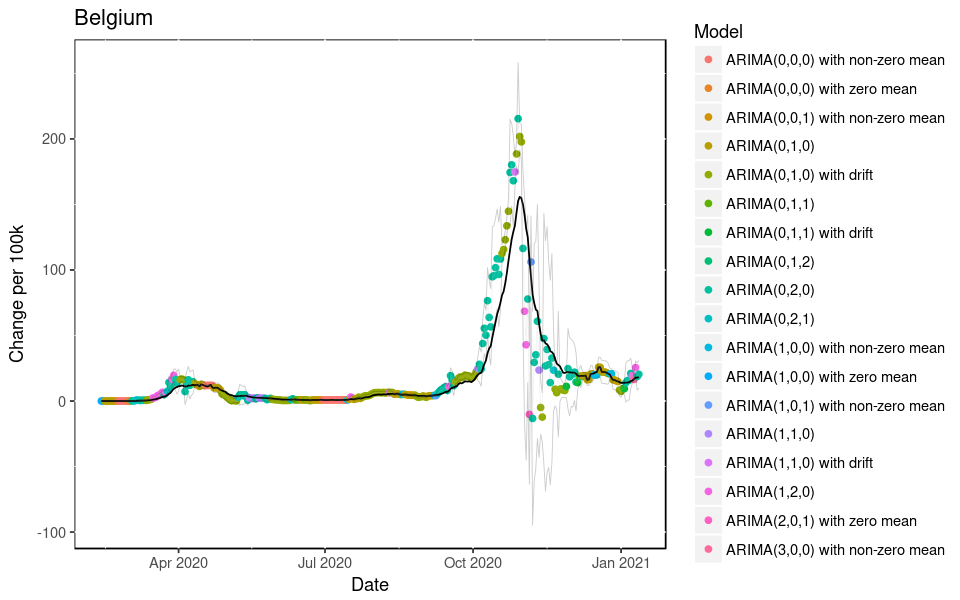

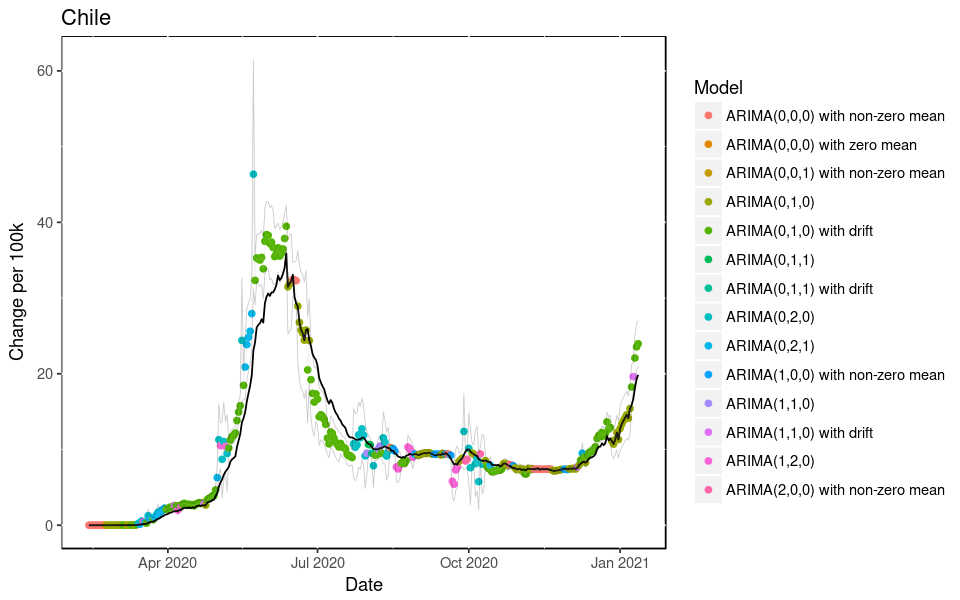

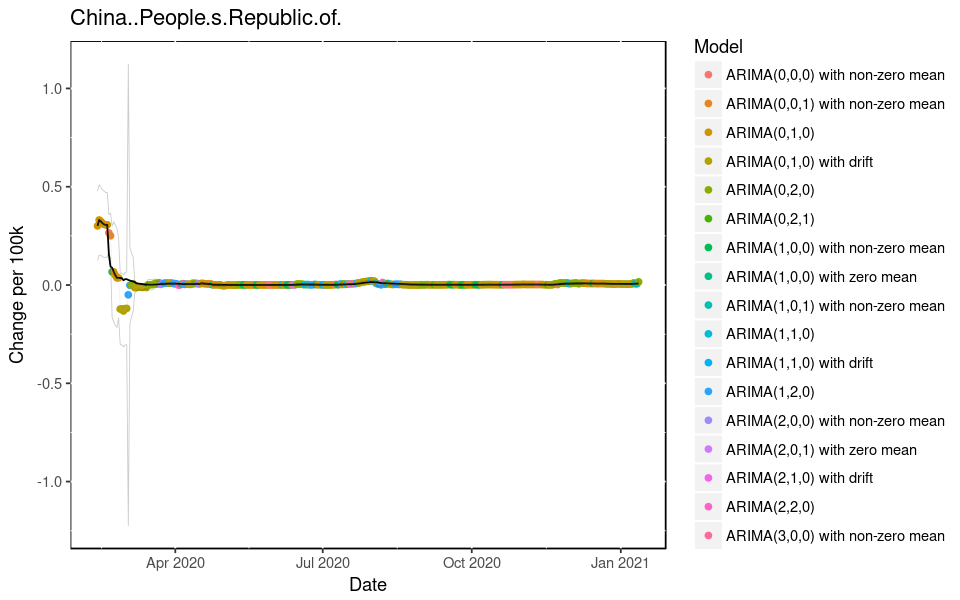

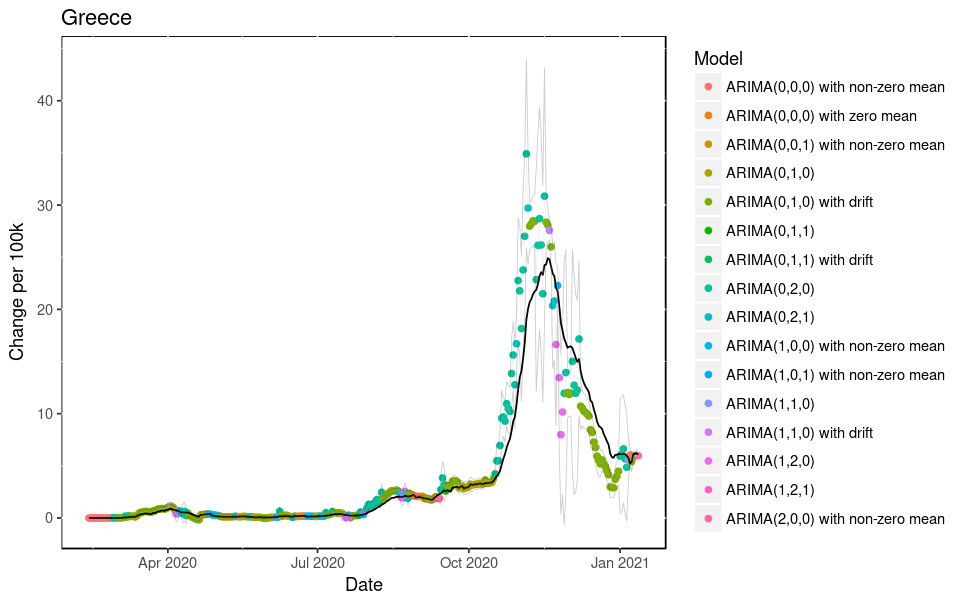

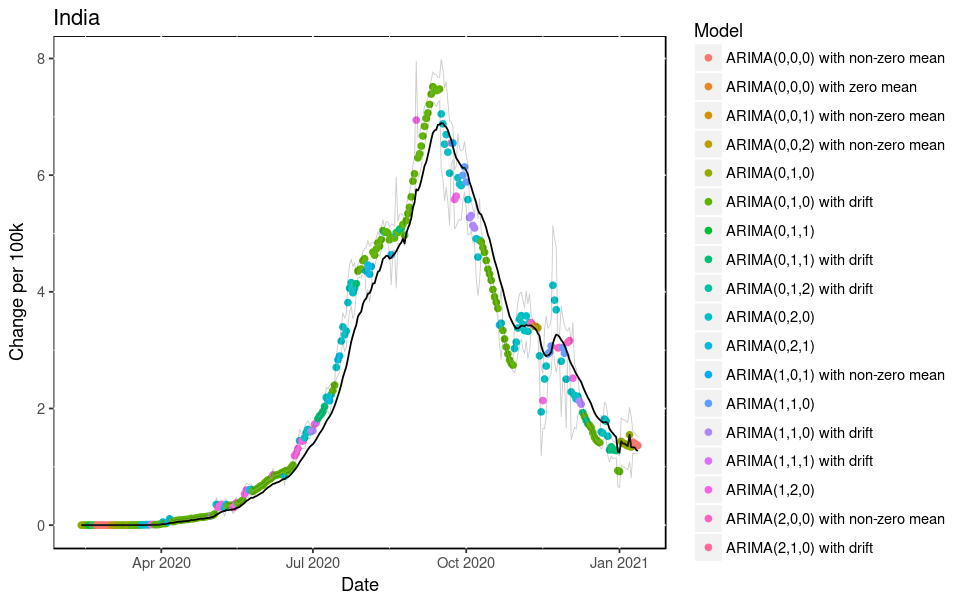

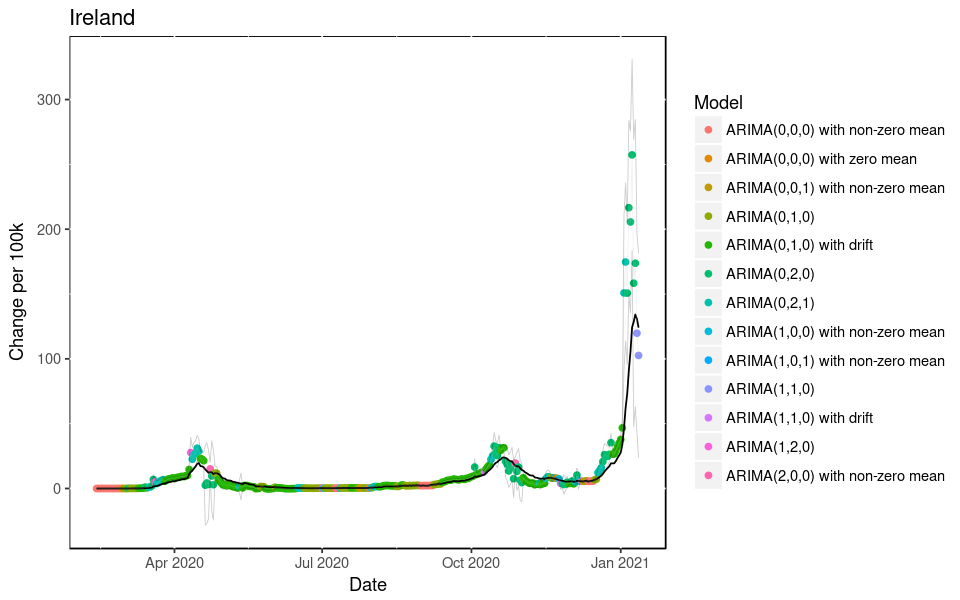

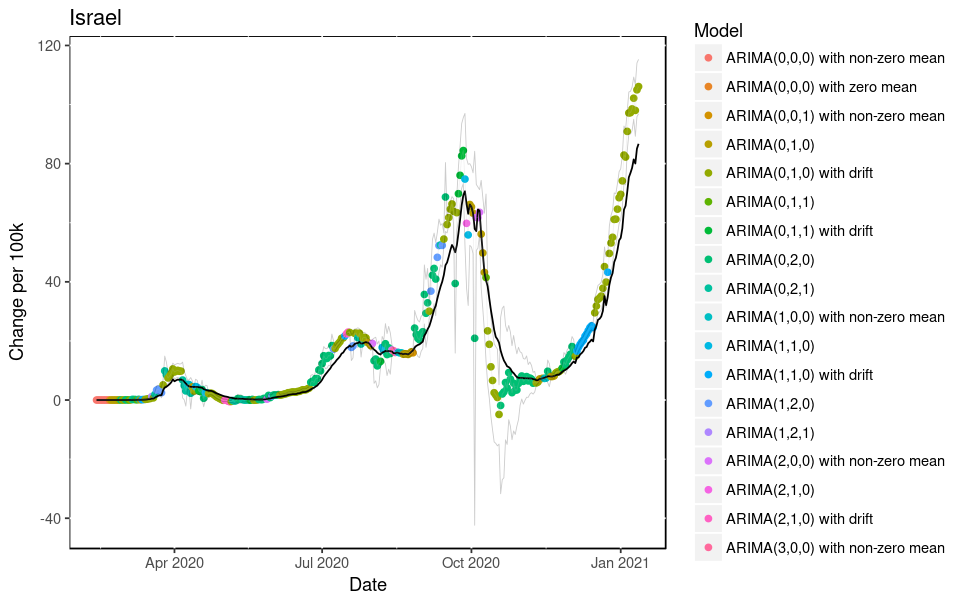

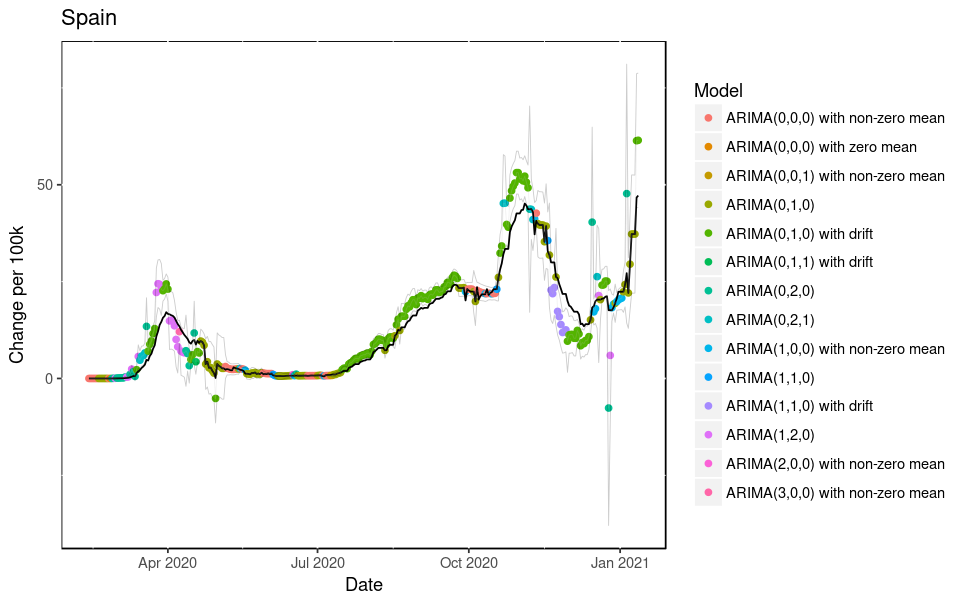

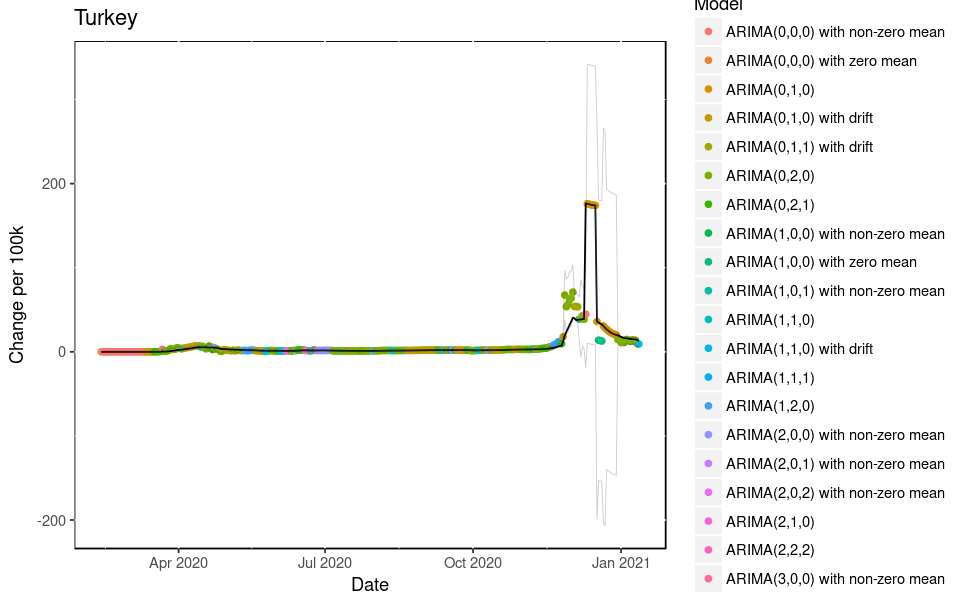

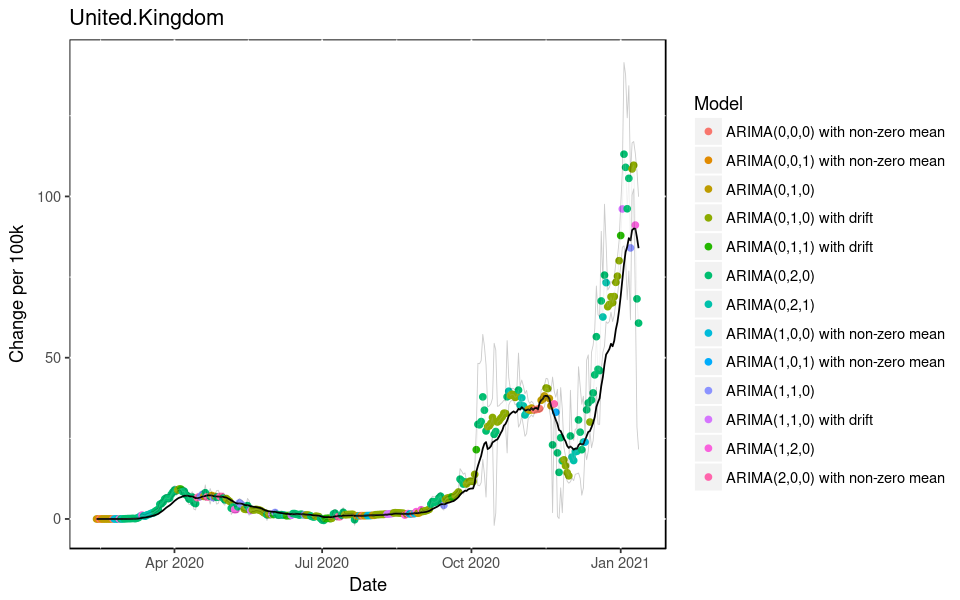

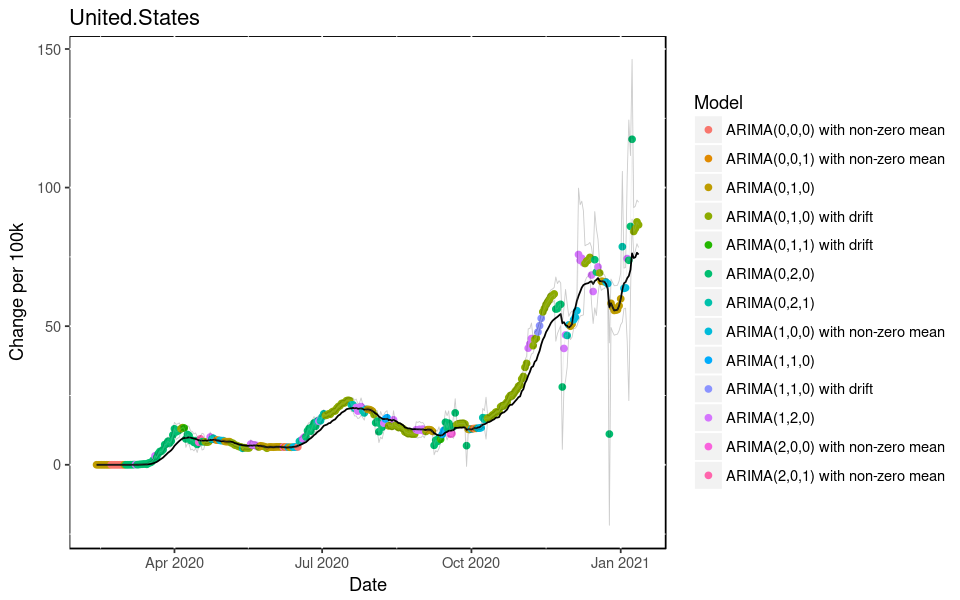

In [29]:
for (n in names(modlist)) {
    main = as.character(n)
    options(repr.plot.width = 8, repr.plot.height = 5)
    print(ggplot(modlist[[n]], aes(as.Date(as.character(Row.names), format = "%Y-%m-%d"), mean)) + ggtitle(main) +
          geom_point(aes(colour = factor(model))) + 
          geom_line(aes(y=rate)) +
          geom_line(aes(y=high),lwd=.25,alpha = 0.2) +
          geom_line(aes(y=low),lwd=.25,alpha = 0.2) +
          geom_line(aes(y=mean),col="gray",lwd=.25,alpha = 0.2) +
          xlab("Date") + ylab("Change per 100k") + 
          theme(panel.background = element_rect(fill = 'white', colour = 'black')) +
          scale_color_discrete(name="Model")
          )
}


                  ME      RMSE      MAE       MPE   MAPE
Test set -0.03007365 0.3341786 0.179388 -4.799952 37.633


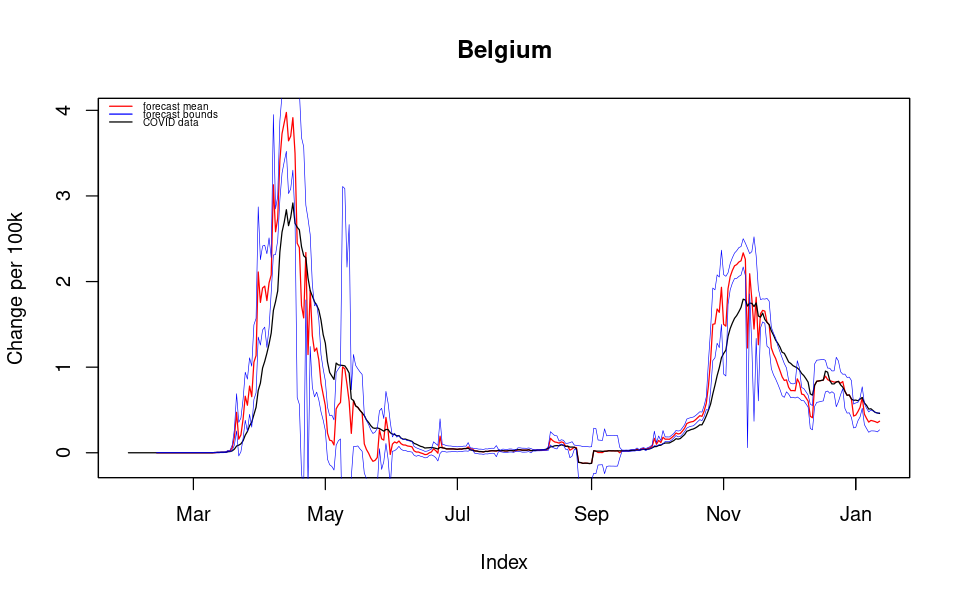

                   ME       RMSE        MAE       MPE     MAPE
Test set -0.004604111 0.08270009 0.02802665 -9.023154 16.14416


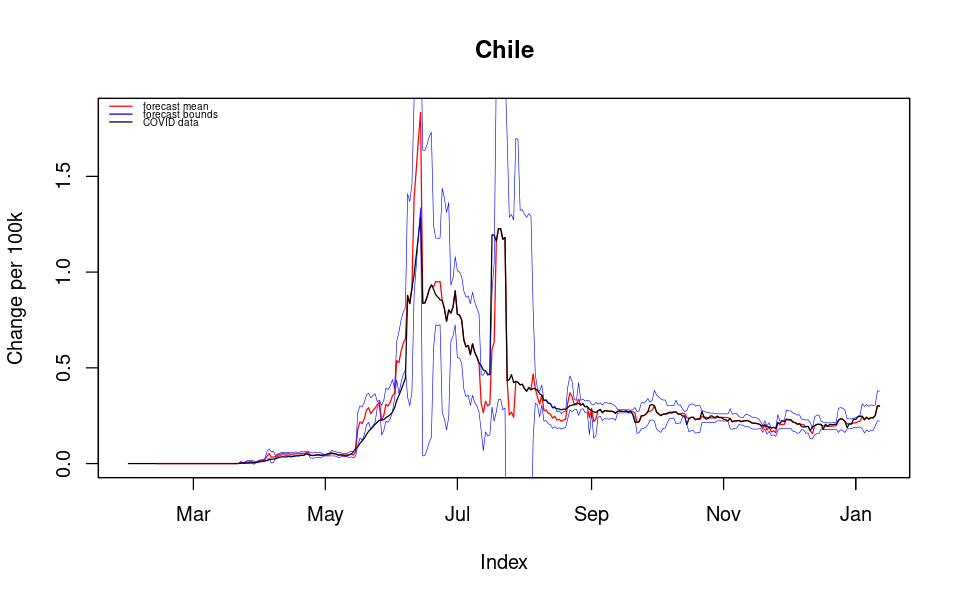

                   ME        RMSE          MAE           MPE         MAPE
Test set 0.0001067249 0.000996643 0.0002435581 -7.484542e+12 7.484542e+12


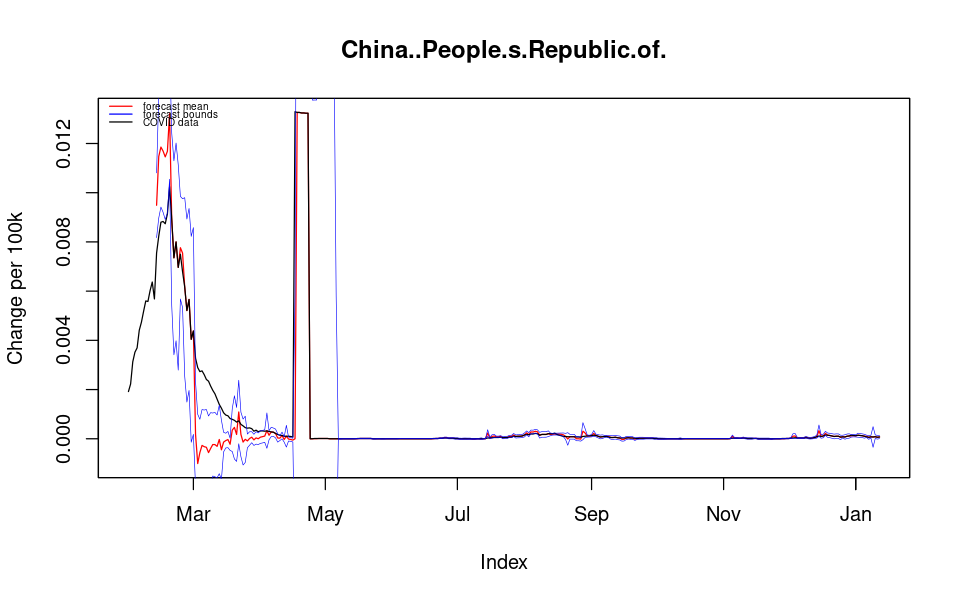

                   ME       RMSE        MAE        MPE     MAPE
Test set -0.008321363 0.07316744 0.03106128 -0.9845153 27.20055


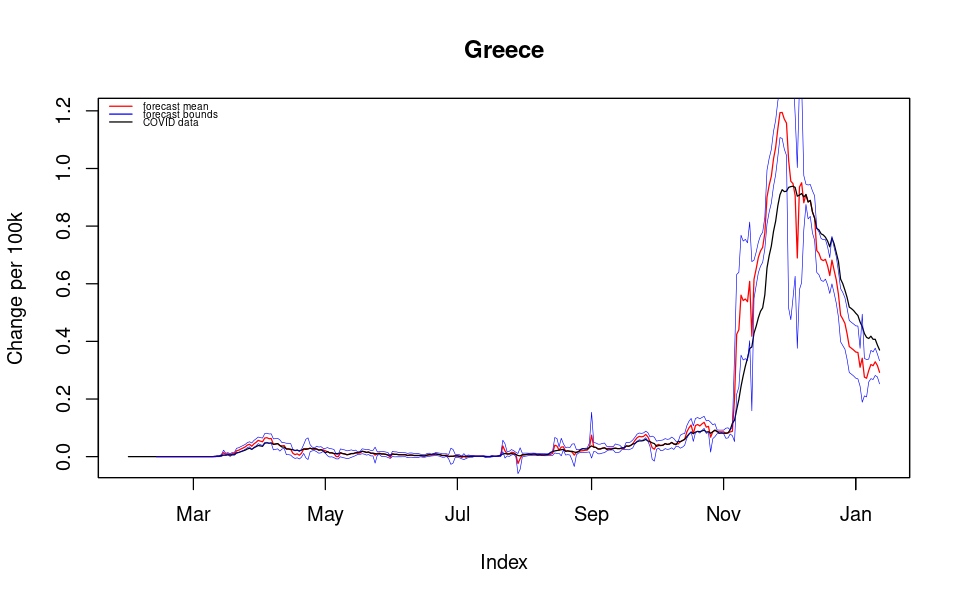

                    ME        RMSE         MAE       MPE     MAPE
Test set -0.0002631124 0.004198467 0.002841302 -8.081779 15.58176


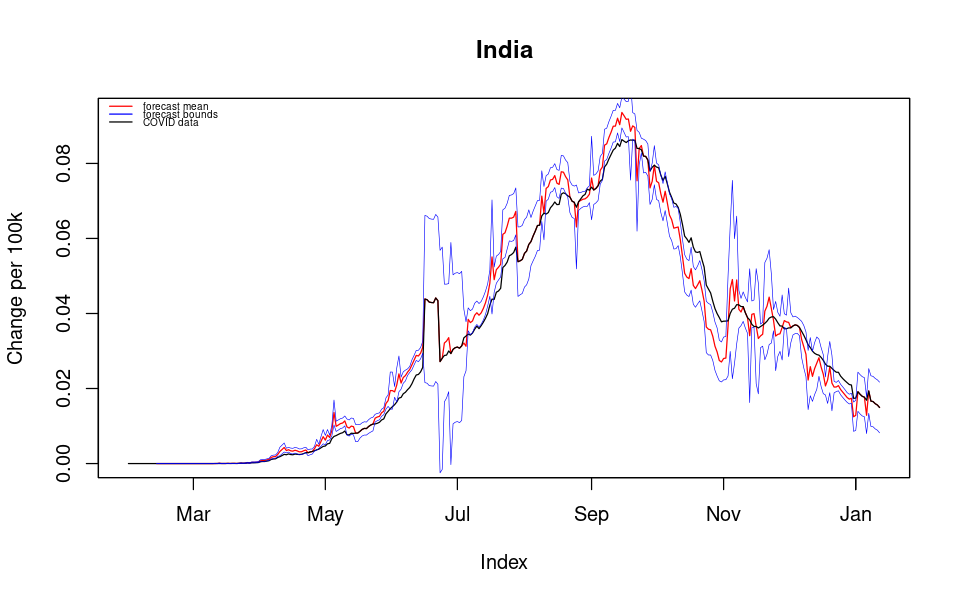

                  ME      RMSE        MAE MPE MAPE
Test set -0.01533325 0.1033003 0.04200959 NaN  Inf


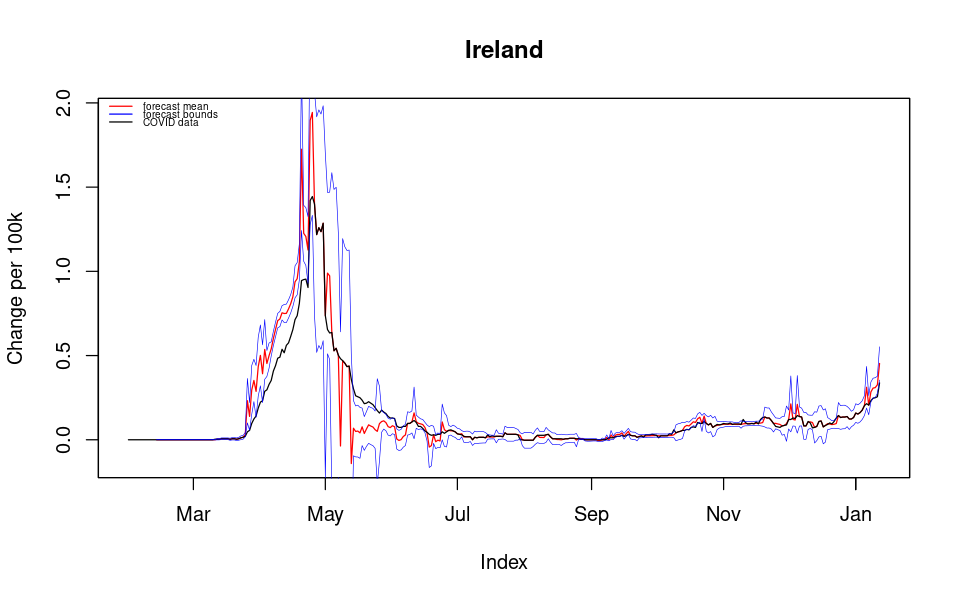

                   ME       RMSE        MAE        MPE     MAPE
Test set -0.004677263 0.03705063 0.02240016 -0.3883621 27.04145


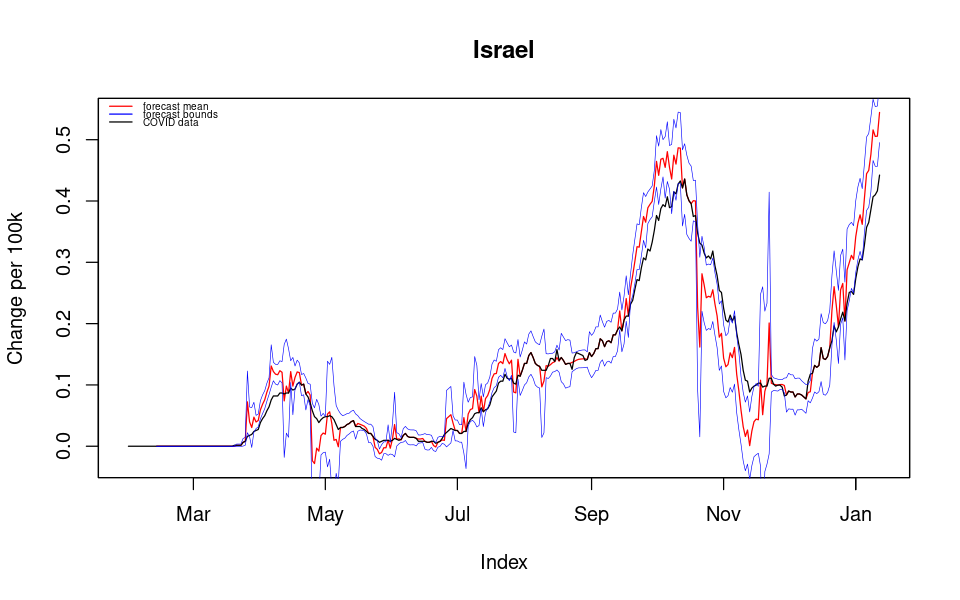

                   ME     RMSE        MAE           MPE         MAPE
Test set -0.003573034 0.226695 0.09012471 -5.534471e+12 5.534471e+12


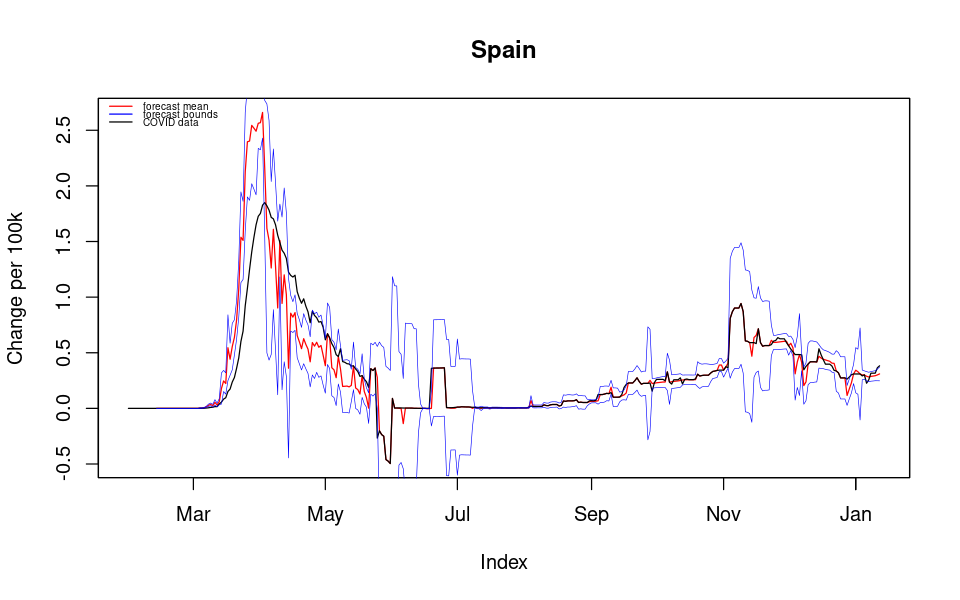

                  ME       RMSE        MAE       MPE     MAPE
Test set -0.00503216 0.02275994 0.01456273 -11.54251 26.74745


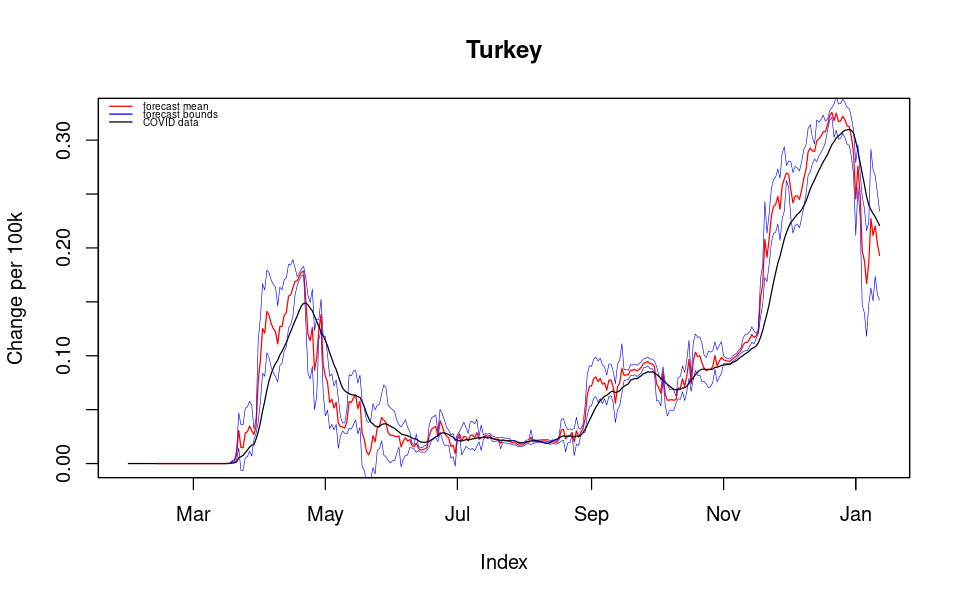

                  ME      RMSE       MAE       MPE     MAPE
Test set -0.02488255 0.1606018 0.0794333 -10.74389 34.28456


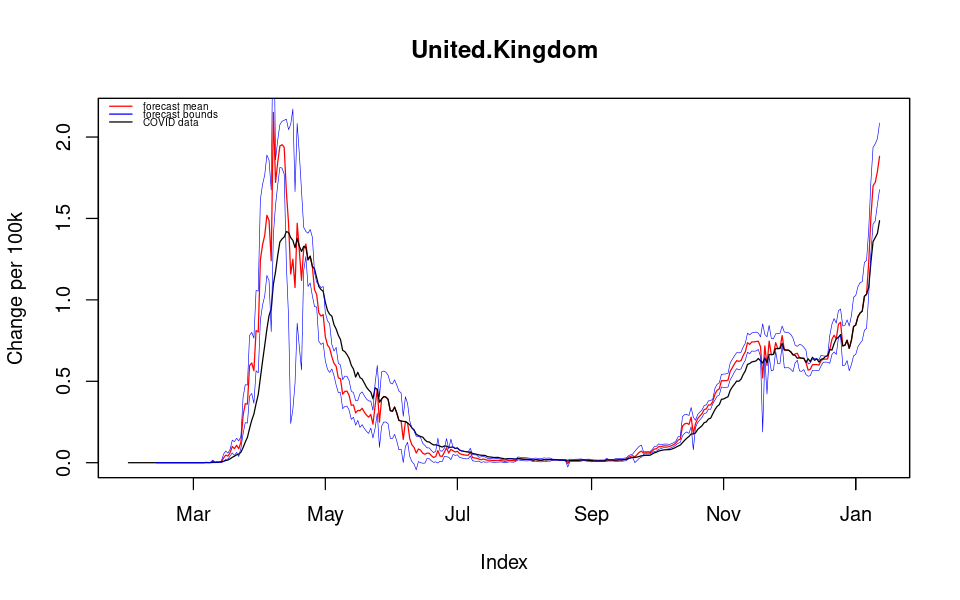

                 ME       RMSE        MAE       MPE     MAPE
Test set -0.0203259 0.09055403 0.05000406 -14.48303 23.93535


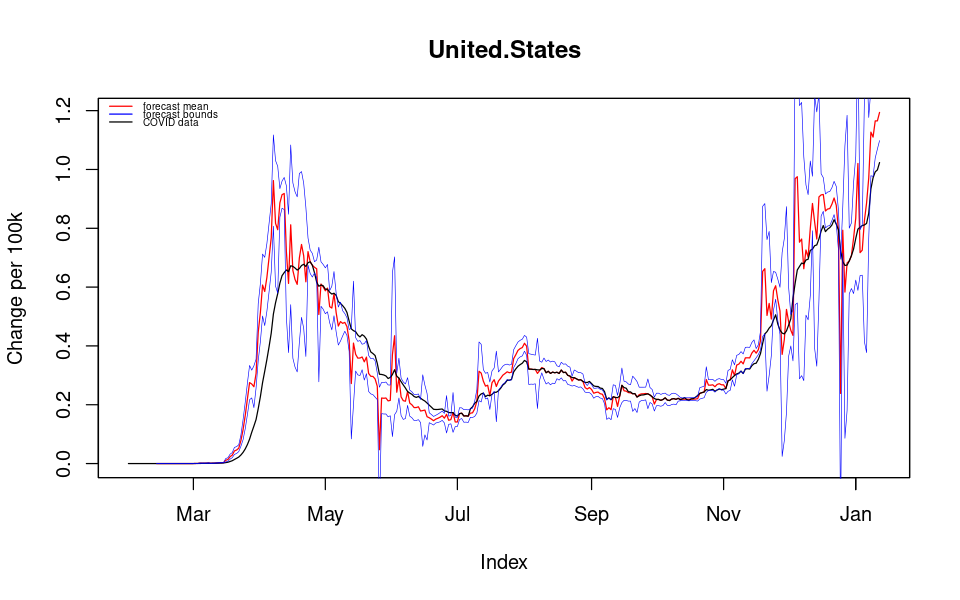

In [31]:
modlist <- list()
for (i in names(deathdiff)) {
    ts1 <- deathdiff[,i]
    #name <- paste0("tsarima.",i)
    modeli <- c()
    tsarima <- rollapply(ts1, 14, a.ari.fun, by.column=FALSE)
    moddf <- data.frame(t(matrix(modeli,2)))
    names(moddf) <- c("Date","model")
    rownames(moddf) <- as.Date(moddf$Date, format = "%Y-%m-%d")
    moddf <- subset(moddf, select = c("model"))
    tsdata <- data.frame(merge(ts1,tsarima))
    names(tsdata) <- c("rate","low", "high", "mean")
    sumfinal <- merge(tsdata,moddf,by=0)
    plot.zoo(tsarima[,"mean"],col="red",plot.type="single",main = i,ylab = "Change per 100k")
    lines(ts1,col="black")
    lines(tsarima[,"high"],col="blue", lwd = .5)
    lines(tsarima[,"low"],col="blue", lwd = .5)
    legend("topleft", inset=c(0,0), y.intersp = 1,
           legend = c("forecast mean", "forecast bounds", "COVID data"),
           lty = 1, bty = "n", col = c("red","blue","black"), cex = .5)
    print(accuracy(ts(tsarima$mean),ts1))
    modlist[[i]] <- sumfinal
}

In [32]:
df <- data.frame(matrix(ncol = 1, nrow = 0))
x <- c("summary.modlist..i...model.")
colnames(df) <- x
b <- list()
for (i in names(modlist)) {
    print(i)
    df2 <- as.matrix(summary(modlist[[i]]$model))
    b[[i]] <- df2
    }
b
c <- list()
for (n in b) {
    for (i in rownames(n)) {
        c[[i]] <- sum(as.vector(n[i,]),c[[i]])
    }
}

modelsumdf <- as.matrix(unlist(c))
data.frame(modelsumdf[order(-modelsumdf[,1]),])

[1] "Belgium"
[1] "Chile"
[1] "China..People.s.Republic.of."
[1] "Greece"
[1] "India"
[1] "Ireland"
[1] "Israel"
[1] "Spain"
[1] "Turkey"
[1] "United.Kingdom"
[1] "United.States"


$Belgium
                                [,1]
ARIMA(0,0,0) with non-zero mean   37
ARIMA(0,0,0) with zero mean        2
ARIMA(0,0,1) with non-zero mean    3
ARIMA(0,1,0)                      88
ARIMA(0,1,0) with drift          122
ARIMA(0,1,1) with drift            1
ARIMA(0,2,0)                      31
ARIMA(0,2,1)                      16
ARIMA(1,0,0) with non-zero mean    8
ARIMA(1,0,0) with zero mean        3
ARIMA(1,0,1) with non-zero mean    2
ARIMA(1,1,0)                       1
ARIMA(1,1,0) with drift            1
ARIMA(1,2,0)                      18
ARIMA(2,0,0) with non-zero mean    2

$Chile
                                [,1]
ARIMA(0,0,0) with non-zero mean   77
ARIMA(0,0,0) with zero mean        1
ARIMA(0,0,1) with non-zero mean    7
ARIMA(0,1,0)                     130
ARIMA(0,1,0) with drift           47
ARIMA(0,1,1) with drift            1
ARIMA(0,2,0)                      28
ARIMA(0,2,1)                       1
ARIMA(1,0,0) with non-zero mean   19
ARIMA(1,0,0) with zero mean        3
ARIMA(1,0,1) with non-zero mean    1
ARIMA(1,1,0)                       3
ARIMA(1,1,0) with drift            6
ARIMA(1,2,0)                       7
ARIMA(2,0,0) with non-zero mean    4

$China..People.s.Republic.of.
                                [,1]
ARIMA(0,0,0) with non-zero mean   39
ARIMA(0,0,0) with zero mean        9
ARIMA(0,0,1) with non-zero mean    5
ARIMA(0,0,1) with zero mean        2
ARIMA(0,1,0)                     168
ARIMA(0,1,0) with drift           51
ARIMA(0,1,1)                       1
ARIMA(0,1,1) with drift            2
ARIMA(0,2,0)                      10
ARIMA(0,2,1)                       4
ARIMA(1,0,0) with non-zero mean   13
ARIMA(1,0,0) with zero mean        9
ARIMA(1,1,0) with drift           13
ARIMA(1,2,0)                       8
ARIMA(1,2,1)                       1

$Greece
                                [,1]
ARIMA(0,0,0) with non-zero mean   42
ARIMA(0,0,0) with zero mean        1
ARIMA(0,0,1) with non-zero mean   11
ARIMA(0,1,0)                     112
ARIMA(0,1,0) with drift           92
ARIMA(0,1,1)                       1
ARIMA(0,1,1) with drift            1
ARIMA(0,2,0)                      23
ARIMA(0,2,1)                      10
ARIMA(1,0,0) with non-zero mean   29
ARIMA(1,1,0) with drift            3
ARIMA(1,2,0)                       4
ARIMA(2,0,0) with non-zero mean    5
ARIMA(2,0,0) with zero mean        1

$India
                                [,1]
ARIMA(0,0,0) with non-zero mean   28
ARIMA(0,0,0) with zero mean        1
ARIMA(0,0,1) with non-zero mean    2
ARIMA(0,1,0)                      77
ARIMA(0,1,0) with drift          155
ARIMA(0,2,0)                      22
ARIMA(0,2,1)                      10
ARIMA(0,2,2)                       1
ARIMA(1,0,0) with non-zero mean    9
ARIMA(1,1,0)                       9
ARIMA(1,1,0) with drift            5
ARIMA(1,2,0)                       9
ARIMA(2,0,0) with non-zero mean    7

$Ireland
                                [,1]
ARIMA(0,0,0) with non-zero mean   73
ARIMA(0,0,0) with zero mean        1
ARIMA(0,0,1) with non-zero mean    5
ARIMA(0,0,1) with zero mean        1
ARIMA(0,1,0)                     126
ARIMA(0,1,0) with drift           52
ARIMA(0,2,0)                       2
ARIMA(0,2,1)                       9
ARIMA(1,0,0) with non-zero mean   18
ARIMA(1,0,0) with zero mean        7
ARIMA(1,0,1) with zero mean        2
ARIMA(1,1,0)                       5
ARIMA(1,1,0) with drift           19
ARIMA(1,2,0)                      12
ARIMA(2,0,0) with zero mean        2
ARIMA(2,1,0) with drift            1

$Israel
                                [,1]
ARIMA(0,0,0) with non-zero mean   49
ARIMA(0,0,0) with zero mean        1
ARIMA(0,0,1) with non-zero mean    8
ARIMA(0,1,0)                      95
ARIMA(0,1,0) with drift          113
ARIMA(0,1,1)                       2
ARIMA(0,2,0)                      14
ARIMA(0,2,1)                      15
ARIMA(1,0,0) with non-zero mean   12
ARIMA(1,1,0)                       2
ARIMA(1,1,0) with drift        

modelsumdf.order..modelsumdf...1.....
ARIMA(0,1,0)                    1097                                 
ARIMA(0,1,0) with drift          974                                 
ARIMA(0,0,0) with non-zero mean  497                                 
ARIMA(0,2,0)                     394                                 
ARIMA(1,0,0) with non-zero mean  145                                 
ARIMA(1,2,0)                     125                                 
ARIMA(0,2,1)                      90                                 
ARIMA(1,1,0) with drift           86                                 
ARIMA(1,1,0)                      51                                 
ARIMA(0,0,1) with non-zero mean   48                                 
ARIMA(2,0,0) with non-zero mean   48                                 
ARIMA(0,1,1) with drift           33                                 
ARIMA(1,0,0) with zero mean       30                                 
ARIMA(0,0,0) with zero mean       24                                 
ARIMA(0,1,1)                      10                                 
ARIMA(1,0,1) with non-zero mean    7                                 
ARIMA(2,1,0)                       4                                 
ARIMA(0,0,1) with zero mean        3                                 
ARIMA(1,2,1)                       3                                 
ARIMA(2,0,0) with zero mean        3                                 
ARIMA(1,0,1) with zero mean        2                                 
ARIMA(3,2,0)                       2                                 
ARIMA(2,0,1) with non-zero mean    2                                 
ARIMA(3,0,0) with non-zero mean    2                                 
ARIMA(0,2,2)                       1                                 
ARIMA(2,1,0) with drift            1                                 
ARIMA(1,0,2) with non-zero mean    1                                 
ARIMA(2,0,2) with non-zero mean    1                                 
ARIMA(2,2,0)                       1

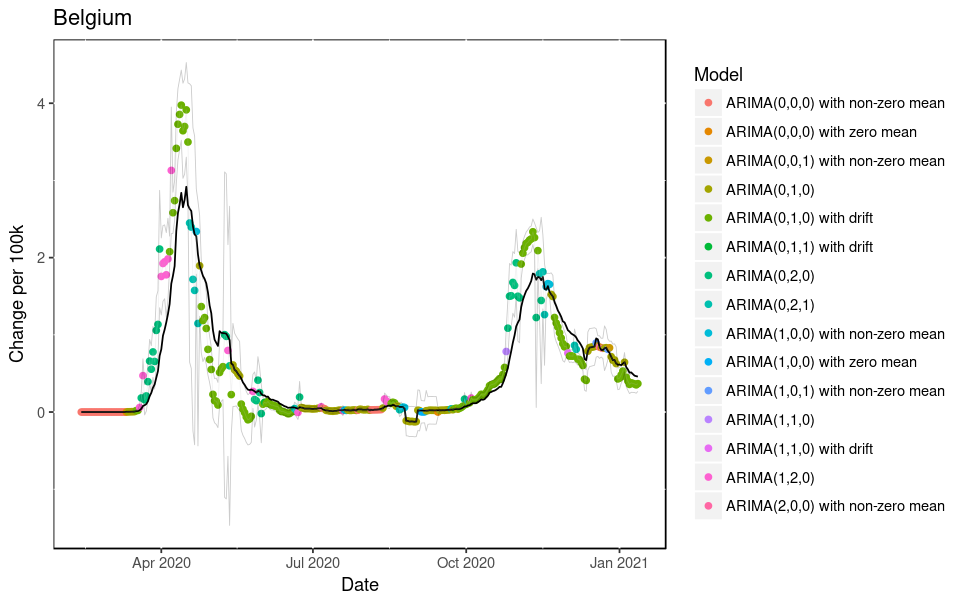

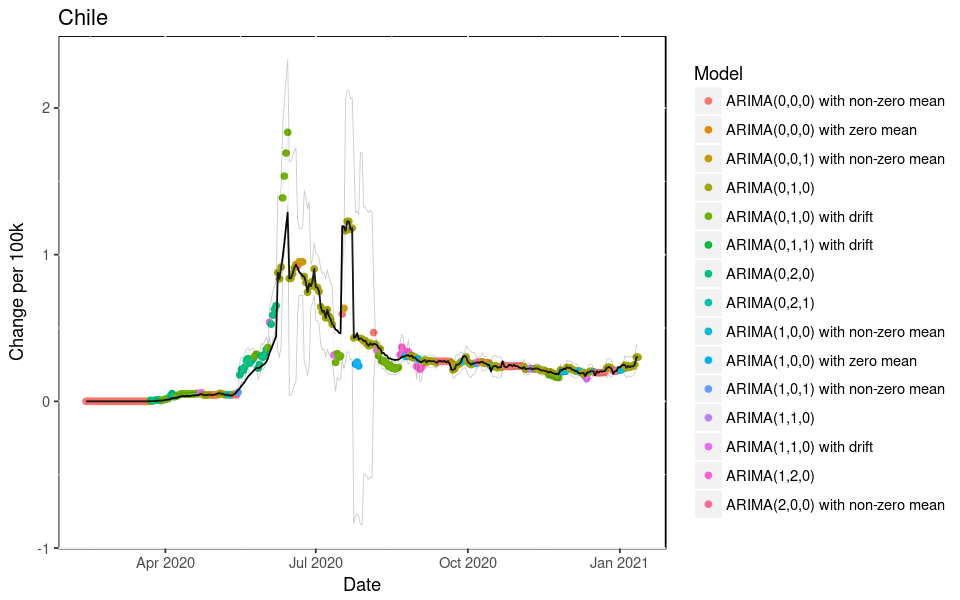

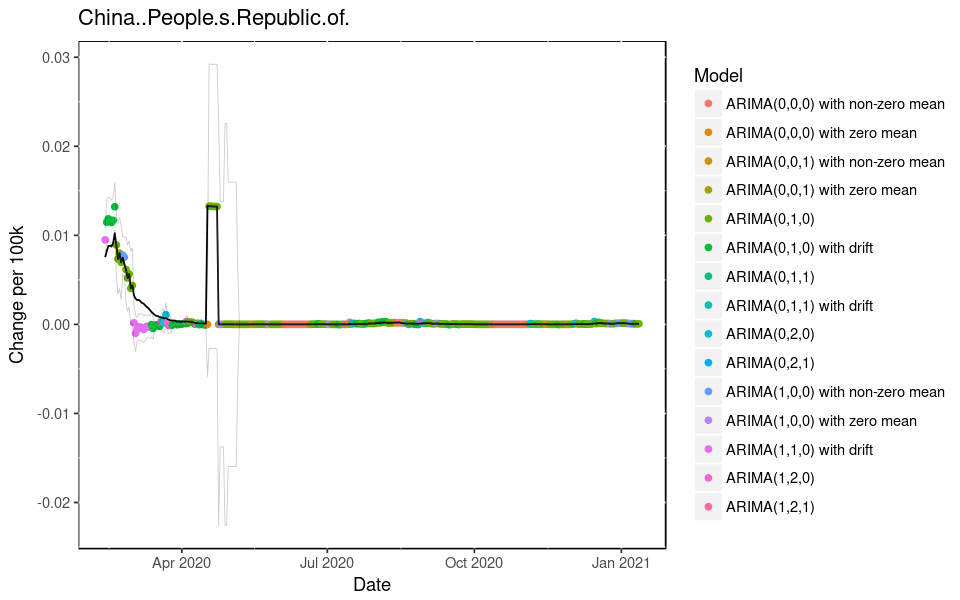

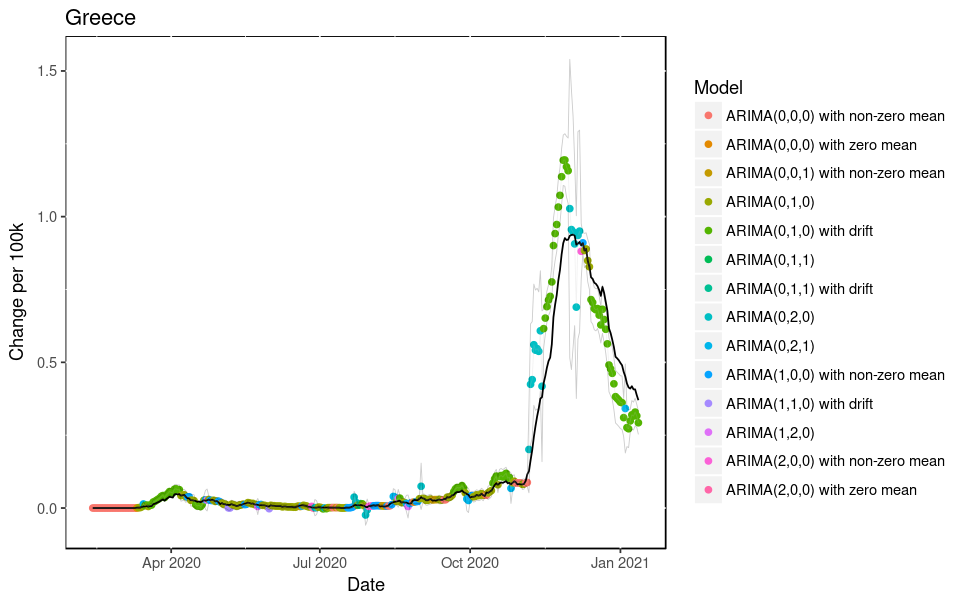

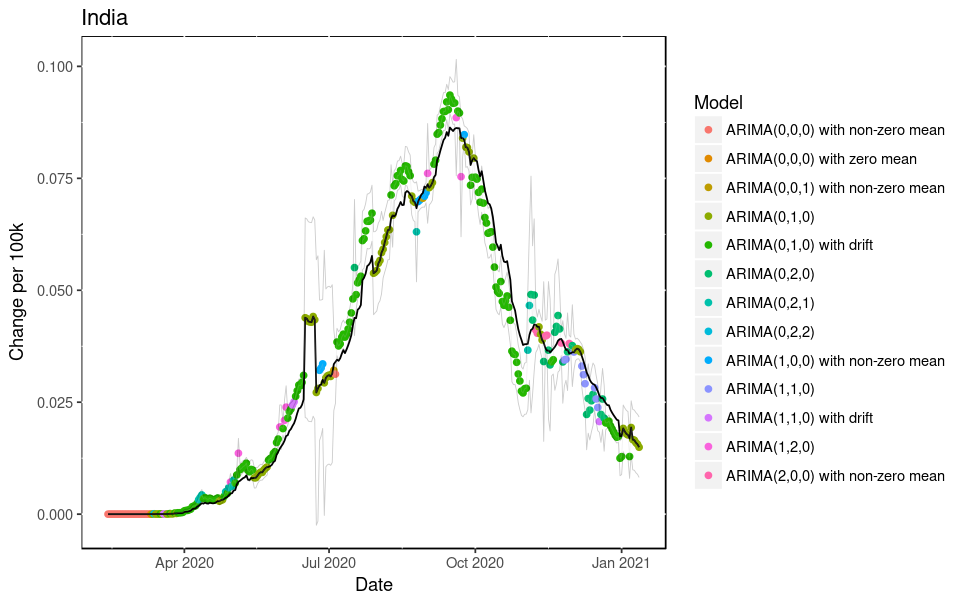

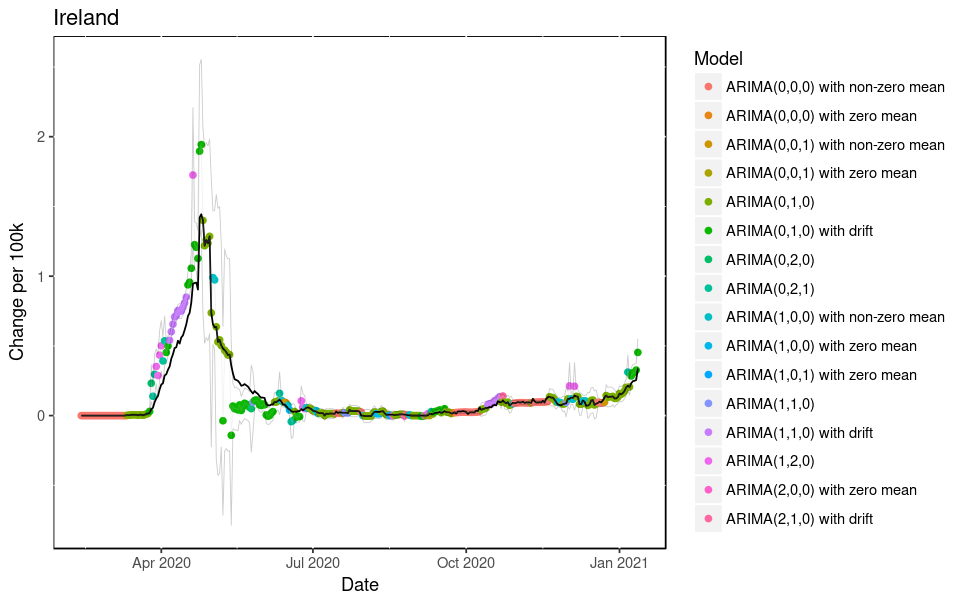

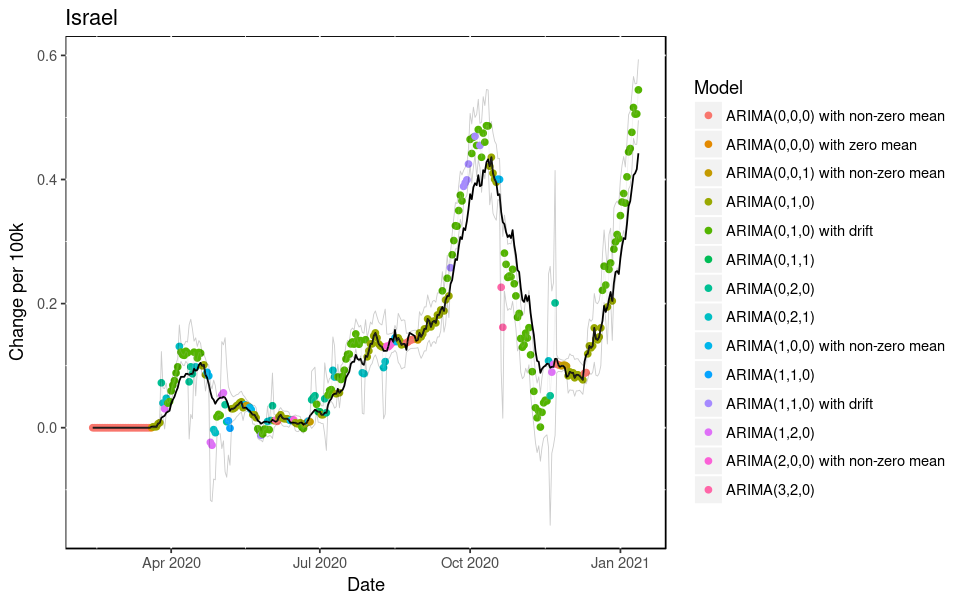

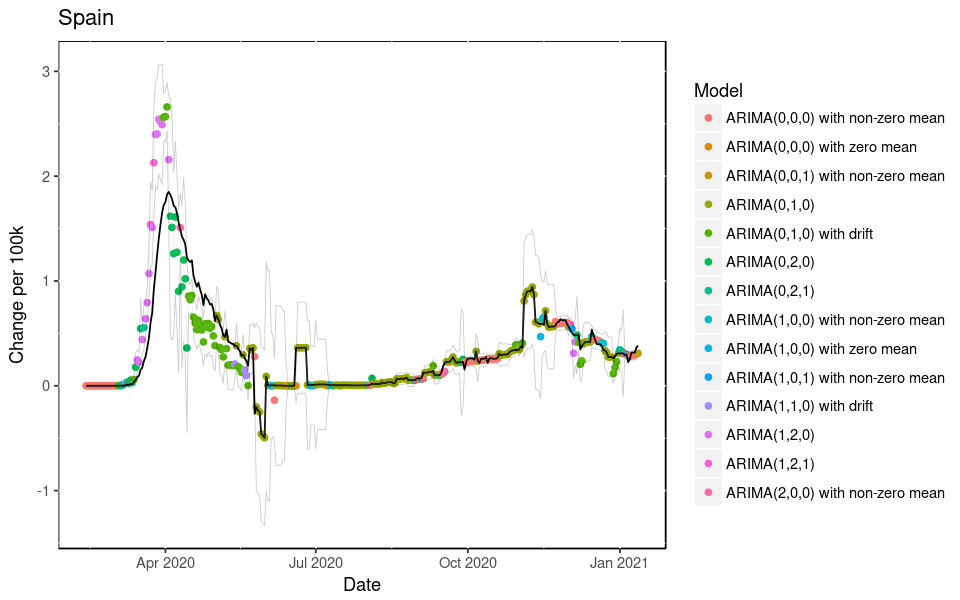

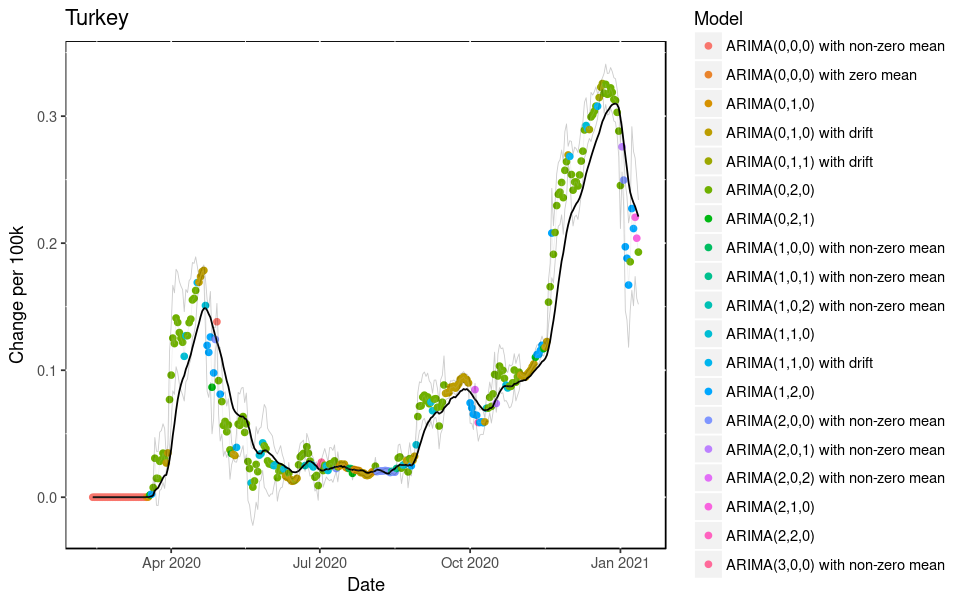

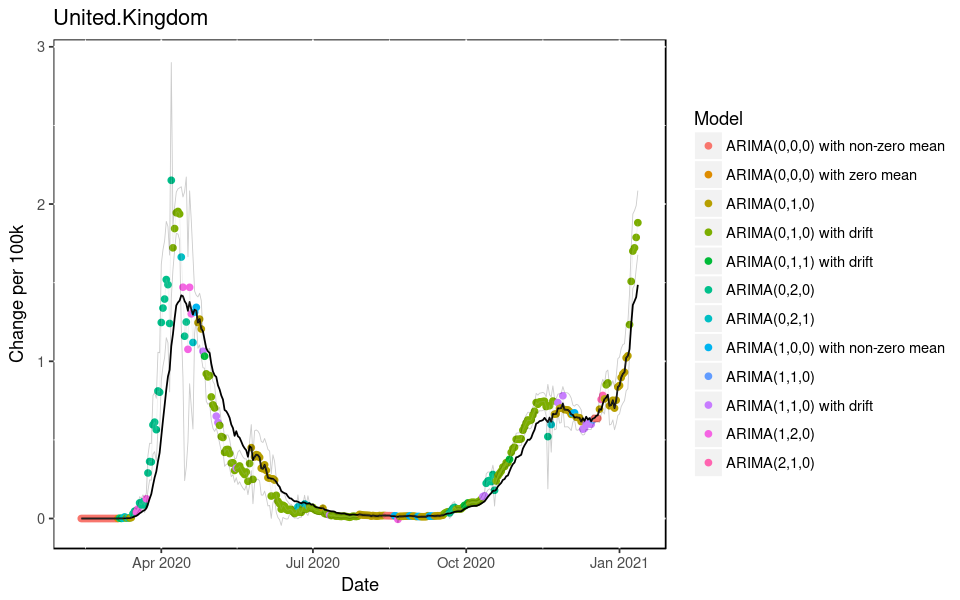

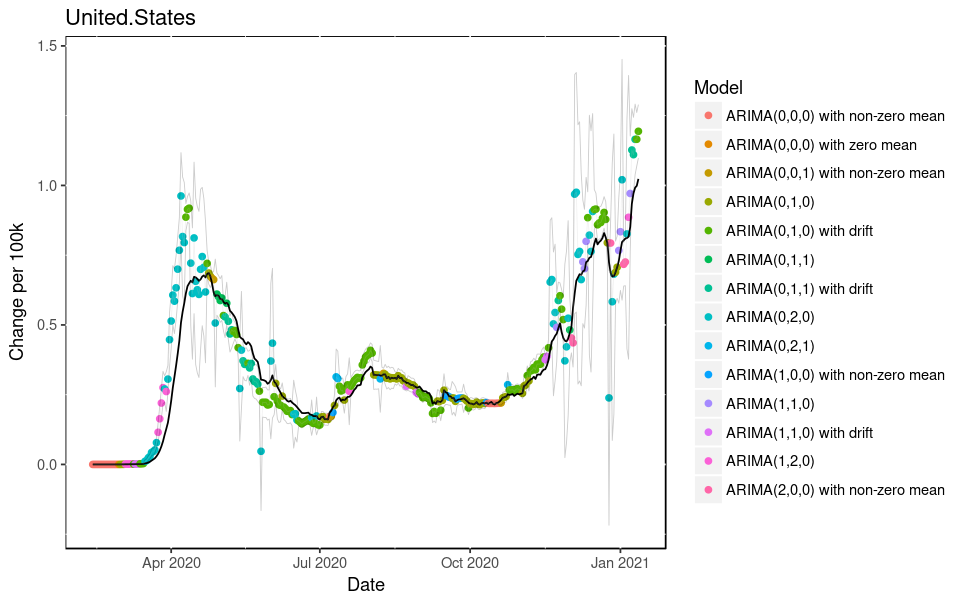

In [33]:
for (n in names(modlist)) {
    main = as.character(n)
    options(repr.plot.width = 8, repr.plot.height = 5)
    print(ggplot(modlist[[n]], aes(as.Date(as.character(Row.names), format = "%Y-%m-%d"), mean)) + ggtitle(main) +
          geom_point(aes(colour = factor(model))) + 
          geom_line(aes(y=rate)) +
          geom_line(aes(y=high),lwd=.25,alpha = 0.2) +
          geom_line(aes(y=low),lwd=.25,alpha = 0.2) +
          geom_line(aes(y=mean),col="gray",lwd=.25,alpha = 0.2) +
          xlab("Date") + ylab("Change per 100k") + 
          theme(panel.background = element_rect(fill = 'white', colour = 'black')) +
          scale_color_discrete(name="Model")
          )
}

In [73]:
casediffall <- as.xts(read.csv("casediffall.csv", row.names = 1, stringsAsFactor = FALSE))
deathdiffall <- as.xts(read.csv("deathdiffall.csv", row.names = 1, stringsAsFactor = FALSE))

In [83]:
colnames(casediffall)

[1] "Afghanistan"                  "Albania"                     
  [3] "Algeria"                      "Andorra"                     
  [5] "Angola"                       "Antigua.and.Barbuda"         
  [7] "Argentina"                    "Armenia"                     
  [9] "Australia"                    "Austria"                     
 [11] "Azerbaijan"                   "Bahamas"                     
 [13] "Bahrain"                      "Bangladesh"                  
 [15] "Barbados"                     "Belarus"                     
 [17] "Belgium"                      "Belize"                      
 [19] "Benin"                        "Bhutan"                      
 [21] "Bolivia"                      "Bosnia.and.Herzegovina"      
 [23] "Botswana"                     "Brazil"                      
 [25] "Brunei"                       "Bulgaria"                    
 [27] "Burkina.Faso"                 "Burundi"                     
 [29] "Cabo.Verde"                   "Cambodia"                    
 [31] "Cameroon"                     "Canada"                      
 [33] "Central.African.Republic"     "Chad"                        
 [35] "Chile"                        "China..People.s.Republic.of."
 [37] "Colombia"                     "Comoros"                     
 [39] "Congo..Brazzaville."          "Congo..Kinshasa."            
 [41] "Costa.Rica"                   "Cote.d.Ivoire"               
 [43] "Croatia"                      "Cuba"                        
 [45] "Cyprus"                       "Czech.Republic"              
 [47] "Denmark"                      "Djibouti"                    
 [49] "Dominica"                     "Dominican.Republic"          
 [51] "Ecuador"                      "Egypt"                       
 [53] "El.Salvador"                  "Equatorial.Guinea"           
 [55] "Estonia"                      "Eswatini"                    
 [57] "Ethiopia"                     "Fiji"                        
 [59] "Finland"                      "France"                      
 [61] "Gabon"                        "Gambia"                      
 [63] "Georgia"                      "Germany"                     
 [65] "Ghana"                        "Greece"                      
 [67] "Grenada"                      "Guatemala"                   
 [69] "Guinea"                       "Guinea.Bissau"               
 [71] "Guyana"                       "Haiti"                       
 [73] "Honduras"                     "Hungary"                     
 [75] "Iceland"                      "India"                       
 [77] "Indonesia"                    "Iran"                        
 [79] "Iraq"                         "Ireland"                     
 [81] "Israel"                       "Italy"                       
 [83] "Jamaica"                      "Japan"                       
 [85] "Jordan"                       "Kazakhstan"                  
 [87] "Kenya"                        "Korea"                       
 [89] "Kuwait"                       "Kyrgyzstan"                  
 [91] "Laos"                         "Latvia"                      
 [93] "Lebanon"                      "Lesotho"                     
 [95] "Liberia"                      "Libya"                       
 [97] "Liechtenstein"                "Lithuania"                   
 [99] "Luxembourg"                   "Madagascar"                  
[101] "Malawi"                       "Malaysia"                    
[103] "Maldives"                     "Mali"                        
[105] "Malta"                        "Marshall.Islands"            
[107] "Mauritania"                   "Mauritius"                   
[109] "Mexico"                       "Moldova"                     
[111] "Mongolia"                     "Montenegro"                  
[113] "Morocco"                      "Mozambique"                  
[115] "Namibia"                      "Nepal"                       
[117] "Netherlands"                  "New.Zealand"        

                ME     RMSE      MAE       MPE     MAPE
Test set -1.323165 3.749843 1.872425 -13.07603 29.02273


[,1]
ARIMA(0,0,0) with non-zero mean   9 
ARIMA(0,0,0) with zero mean       2 
ARIMA(0,0,1) with non-zero mean  11 
ARIMA(0,1,0)                     85 
ARIMA(0,1,0) with drift         111 
ARIMA(0,1,1)                      4 
ARIMA(0,1,1) with drift           7 
ARIMA(0,2,0)                     58 
ARIMA(0,2,1)                     14 
ARIMA(1,0,0) with non-zero mean   4 
ARIMA(1,0,1) with non-zero mean   1 
ARIMA(1,1,0)                      8 
ARIMA(1,1,0) with drift           1 
ARIMA(1,2,0)                     10 
ARIMA(2,0,0) with non-zero mean   9 
ARIMA(2,0,1) with non-zero mean   1 
ARIMA(3,2,0)                      1

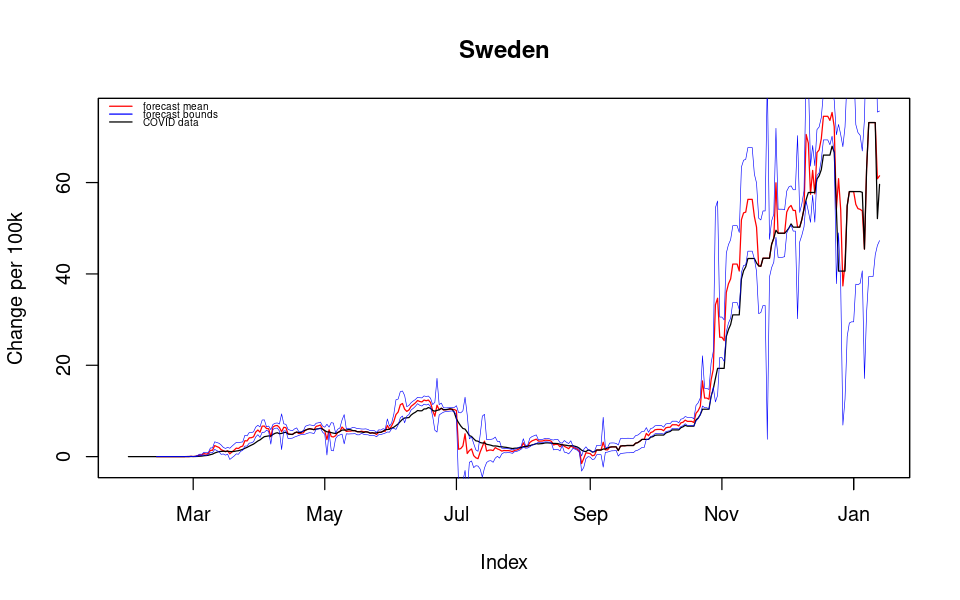

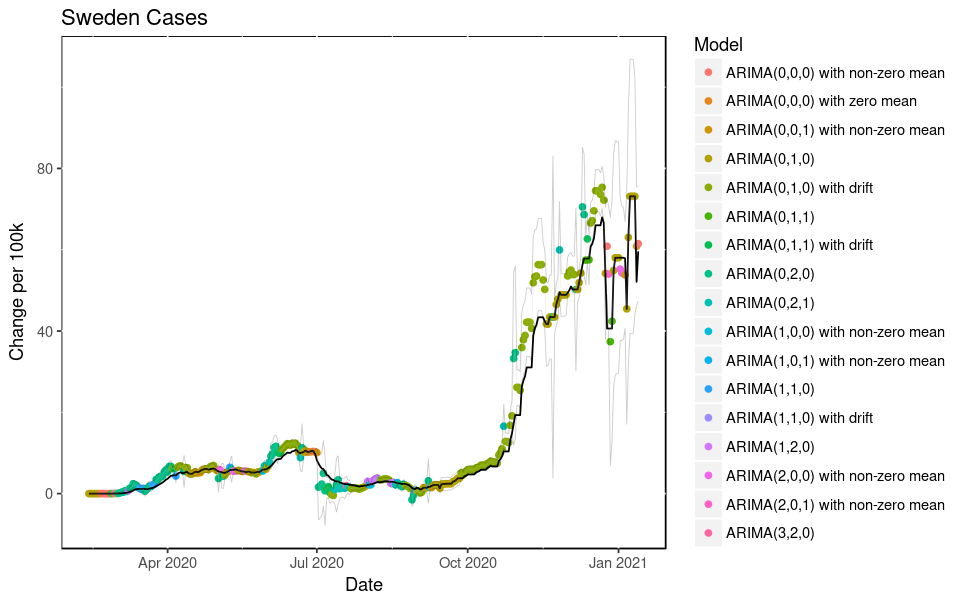

                   ME      RMSE        MAE       MPE     MAPE
Test set -0.008718674 0.1005667 0.05020839 0.9408743 34.51623


[,1]
ARIMA(0,0,0) with non-zero mean  33 
ARIMA(0,0,0) with zero mean       1 
ARIMA(0,0,1) with non-zero mean   6 
ARIMA(0,1,0)                    113 
ARIMA(0,1,0) with drift          97 
ARIMA(0,1,1)                      1 
ARIMA(0,2,0)                     33 
ARIMA(0,2,1)                      9 
ARIMA(0,2,2)                      1 
ARIMA(1,0,0) with non-zero mean  14 
ARIMA(1,0,0) with zero mean       5 
ARIMA(1,0,1) with non-zero mean   3 
ARIMA(1,1,0)                      2 
ARIMA(1,1,0) with drift           2 
ARIMA(1,2,0)                     10 
ARIMA(2,0,0) with non-zero mean   4 
ARIMA(2,1,0) with drift           1 
ARIMA(2,2,0)                      1

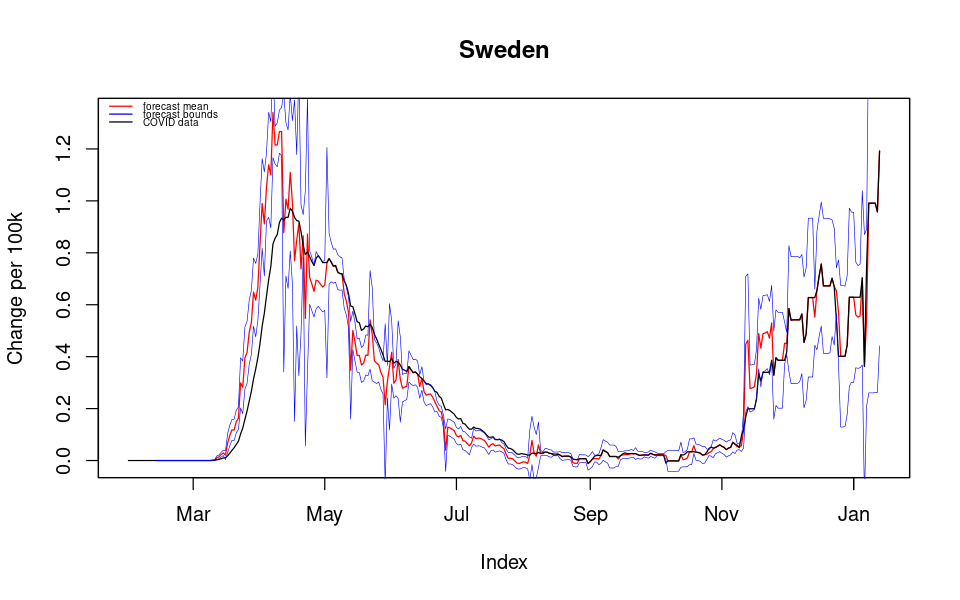

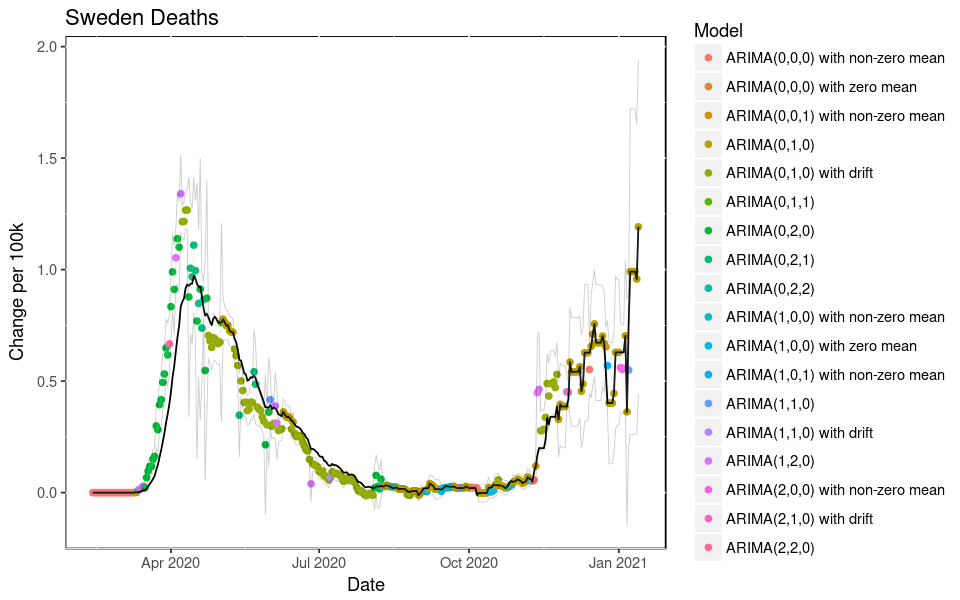

In [85]:
countryselect = "Sweden"
casesel <- casediffall[,countryselect]
deathsel <- deathdiffall[,countryselect]

ts1 <- casesel[,1]
modeli <- c()
selarima <- rollapply(ts1,14,a.ari.fun, by.column=FALSE)
moddf <- data.frame(t(matrix(modeli,2)))
names(moddf) <- c("Date","model")
rownames(moddf) <- as.Date(moddf$Date, format = "%Y-%m-%d")
moddf <- subset(moddf, select = c("model"))
tsdata <- data.frame(merge(ts1,selarima))
names(tsdata) <- c("rate","low", "high", "mean")
sumfinal <- merge(tsdata,moddf,by=0)
plot.zoo(selarima[,"mean"],col="red",plot.type="single",main = countryselect,ylab = "Change per 100k")
lines(ts1,col="black")
lines(selarima[,"high"],col="blue", lwd = .5)
lines(selarima[,"low"],col="blue", lwd = .5)
legend("topleft", inset=c(0,0), y.intersp = 1,
        legend = c("forecast mean", "forecast bounds", "COVID data"),
        lty = 1, bty = "n", col = c("red","blue","black"), cex = .5)
print(accuracy(ts(selarima$mean),ts1))
as.matrix(summary(sumfinal$model))
main = paste(as.character(countryselect),"Cases")
options(repr.plot.width = 8, repr.plot.height = 5)
print(ggplot(sumfinal, aes(as.Date(as.character(Row.names), format = "%Y-%m-%d"), mean)) + ggtitle(main) +
          geom_point(aes(colour = factor(model))) + 
          geom_line(aes(y=rate)) +
          geom_line(aes(y=high),lwd=.25,alpha = 0.2) +
          geom_line(aes(y=low),lwd=.25,alpha = 0.2) +
          geom_line(aes(y=mean),col="gray",lwd=.25,alpha = 0.2) +
          xlab("Date") + ylab("Change per 100k") + 
          theme(panel.background = element_rect(fill = 'white', colour = 'black')) +
          scale_color_discrete(name="Model")
          )

ts1 <- deathsel[,1]
modeli <- c()
selarima <- rollapply(ts1,14,a.ari.fun, by.column=FALSE)
moddf <- data.frame(t(matrix(modeli,2)))
names(moddf) <- c("Date","model")
rownames(moddf) <- as.Date(moddf$Date, format = "%Y-%m-%d")
moddf <- subset(moddf, select = c("model"))
tsdata <- data.frame(merge(ts1,selarima))
names(tsdata) <- c("rate","low", "high", "mean")
sumfinal <- merge(tsdata,moddf,by=0)
plot.zoo(selarima[,"mean"],col="red",plot.type="single",main = countryselect,ylab = "Change per 100k")
lines(ts1,col="black")
lines(selarima[,"high"],col="blue", lwd = .5)
lines(selarima[,"low"],col="blue", lwd = .5)
legend("topleft", inset=c(0,0), y.intersp = 1,
        legend = c("forecast mean", "forecast bounds", "COVID data"),
        lty = 1, bty = "n", col = c("red","blue","black"), cex = .5)
print(accuracy(ts(selarima$mean),ts1))
as.matrix(summary(sumfinal$model))
main = paste(as.character(countryselect),"Deaths")
options(repr.plot.width = 8, repr.plot.height = 5)
print(ggplot(sumfinal, aes(as.Date(as.character(Row.names), format = "%Y-%m-%d"), mean)) + ggtitle(main) +
          geom_point(aes(colour = factor(model))) + 
          geom_line(aes(y=rate)) +
          geom_line(aes(y=high),lwd=.25,alpha = 0.2) +
          geom_line(aes(y=low),lwd=.25,alpha = 0.2) +
          geom_line(aes(y=mean),col="gray",lwd=.25,alpha = 0.2) +
          xlab("Date") + ylab("Change per 100k") + 
          theme(panel.background = element_rect(fill = 'white', colour = 'black')) +
          scale_color_discrete(name="Model")
          )

In [96]:
autari <- auto.arima(casediffall[,"United.States"])

In [113]:
autari

Series: casediffall[, "United.States"] 
ARIMA(1,2,1)                    

Coefficients:
          ar1      ma1
      -0.1943  -0.5363
s.e.   0.0828   0.0741

sigma^2 estimated as 0.545:  log likelihood=-386.34
AIC=778.67   AICc=778.74   BIC=790.22